# <center> **📈 Predicting Term Deposit Subscriptions Using Machine Learning Techniques** <center>

# **📝 Problem Statement**

A retail bank has conducted a series of direct marketing campaigns via phone calls to promote term deposit subscriptions. The bank wants to use machine learning to **predict whether a customer will subscribe to a term deposit** based on demographic, financial, and campaign-related attributes.

# **🎯 Objective**

To develop a classification model that accurately predicts the **likelihood of a customer subscribing to a term deposit** using historical campaign data. This can help the bank:

1. Improve targeting for future campaigns.
2. Reduce marketing costs.
3. Increase campaign success rates.

# **🗂️ Data Description**

![](Data_Description_IMG.png)

# **1️⃣ Import Necessary libraries**

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

# **2️⃣ Data Loading and Preview**

In [11]:
df = pd.read_excel("Banking_Call_Data.xlsx")

In [12]:
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [13]:
df.tail(5)

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

# **3️⃣ Data Overview & Cleaning**

In [15]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df.shape

(45211, 17)

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [19]:
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [21]:
# Check for missing values
print('*********** Missing values **********')
print(df.isnull().sum())

*********** Missing values **********
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Our dataset do not have any null/nan/missing values.

In [23]:
Cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Num_cols = [x for x in df.columns.to_list() if x not in Cat_cols]
Cat_cols.remove('y')

In [24]:
print('Categorical features:', Cat_cols)
print('Numerical features:', Num_cols)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [25]:
df['job'].unique().tolist()

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student']

In [26]:
df['marital'].unique().tolist()

['married', 'single', 'divorced']

In [27]:
df['education'].unique().tolist()

['tertiary', 'secondary', 'unknown', 'primary']

In [28]:
df['default'].unique().tolist()

['no', 'yes']

In [29]:
df['housing'].unique().tolist()

['yes', 'no']

In [30]:
df['loan'].unique().tolist()

['no', 'yes']

In [31]:
df['contact'].unique().tolist()

['unknown', 'cellular', 'telephone']

In [32]:
df['month'].unique().tolist()

['may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'jan',
 'feb',
 'mar',
 'apr',
 'sep']

In [33]:
df['poutcome'].unique().tolist()

['unknown', 'failure', 'other', 'success']

In [34]:
#Check for Unique Values
for i in Cat_cols:
    print(i, df[i].unique())
    print(df[i].value_counts())
    print("*************************************************")
    print('  ')

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
*************************************************
  
marital ['married' 'single' 'divorced']
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
*************************************************
  
education ['tertiary' 'secondary' 'unknown' 'primary']
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
*************************************************
  
default ['no' 'yes']
default
no     44396
yes      815
Name: count, dtype: int64
*****************

# **4️⃣ Exploratory Data Analysis (EDA)**

# **A. Univarite Analysis**

In [37]:
## Categorical data

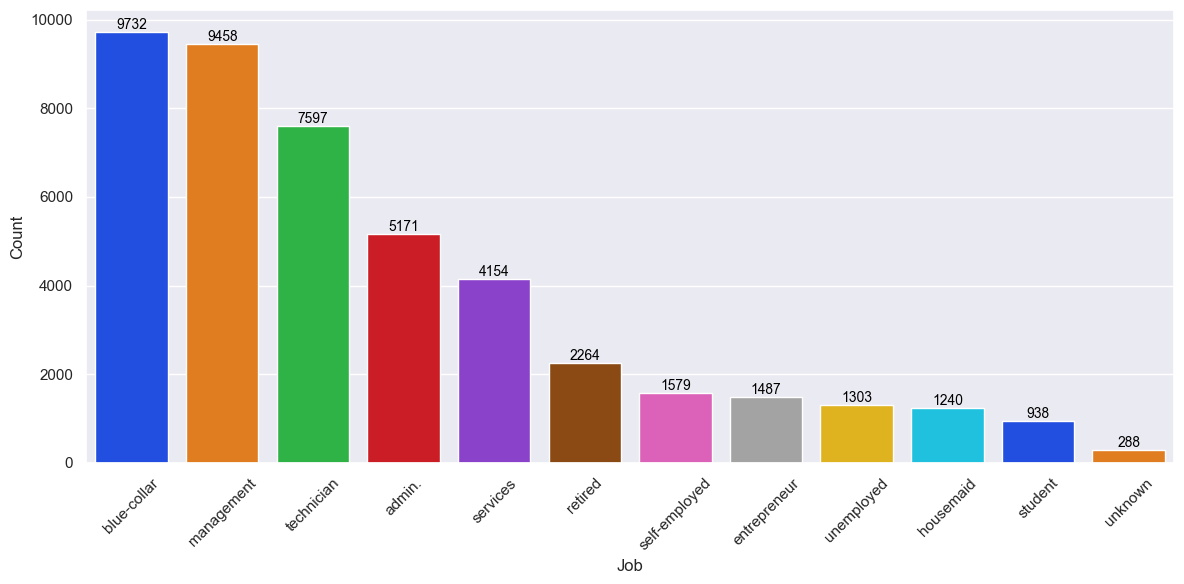

In [38]:
# Bar plot of job distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='job', order = df['job'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Customer Occupations**      
      
* **Blue-collar** is the most common occupation among bank customers, with **9,732** instances.
* The next most prevalent occupations are **management** and **technician**, with **9,458** and **7,597** instances, respectively.
* **Students** make up a smaller segment of the customer base, with **938** recorded cases.
* Other occupations — including **admin**, **services**, **retired**, **self-employed**, **entrepreneur**, **unemployed**, and **housemaid** — are present at varying levels, falling between the most and least common categories.

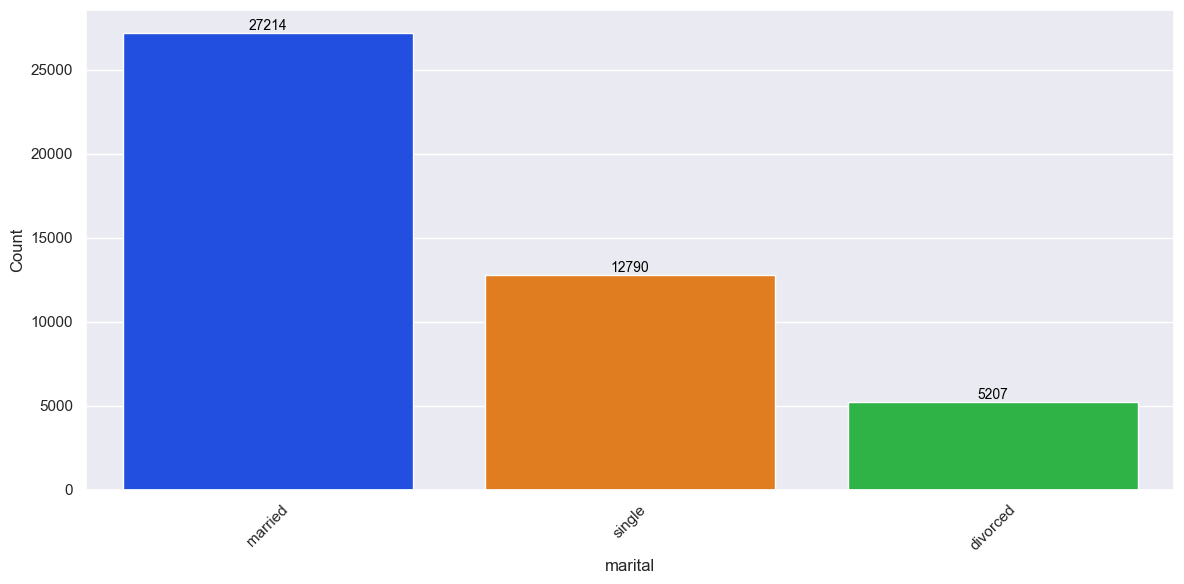

In [40]:
# Bar plot of marital distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='marital', order = df['marital'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('marital')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Marital Status of Customers**    
* **Married** individuals represent the majority of the customer base, with **27,214** instances.
* **Single** customers form the second-largest group, totaling, **12,790**.
* **Divorced**  individuals also account for a notable portion, with **5,207** recorded cases.

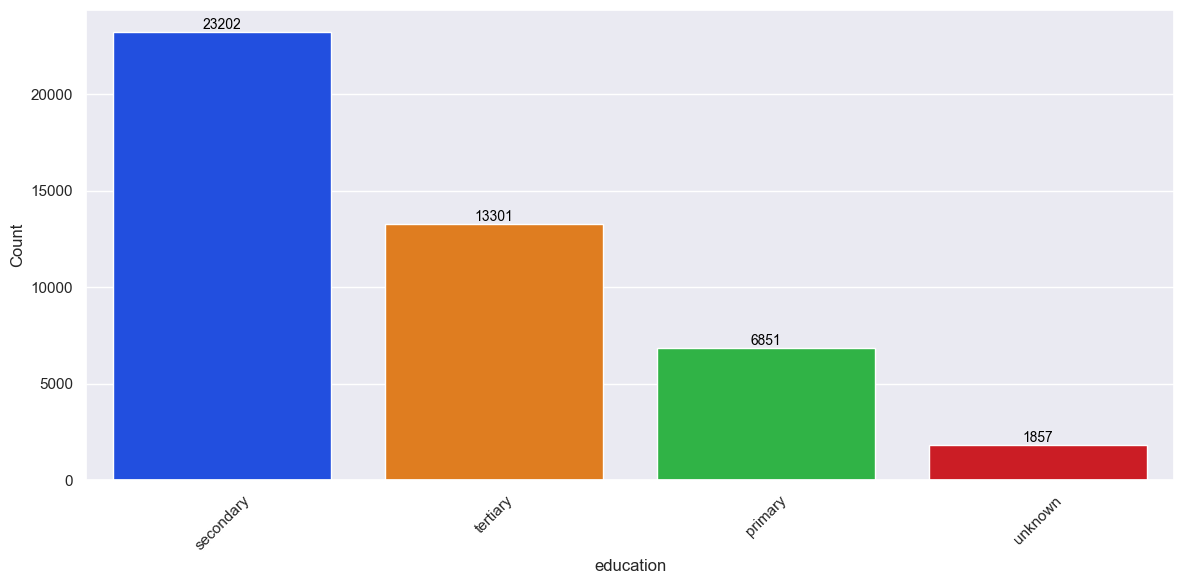

In [42]:
# Bar plot of education distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='education', order = df['education'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('education')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Education Levels of Customers**      
* **Secondary education** is the most common level among bank customers, with **23,202** individuals.
* **Tertiary** and **primary education** levels follow, with **13,301** and **6,851** instances, respectively.
* A relatively small segment of customers (**1,857** instances) have an **unknown education status**, indicating missing or unidentified information in the dataset.

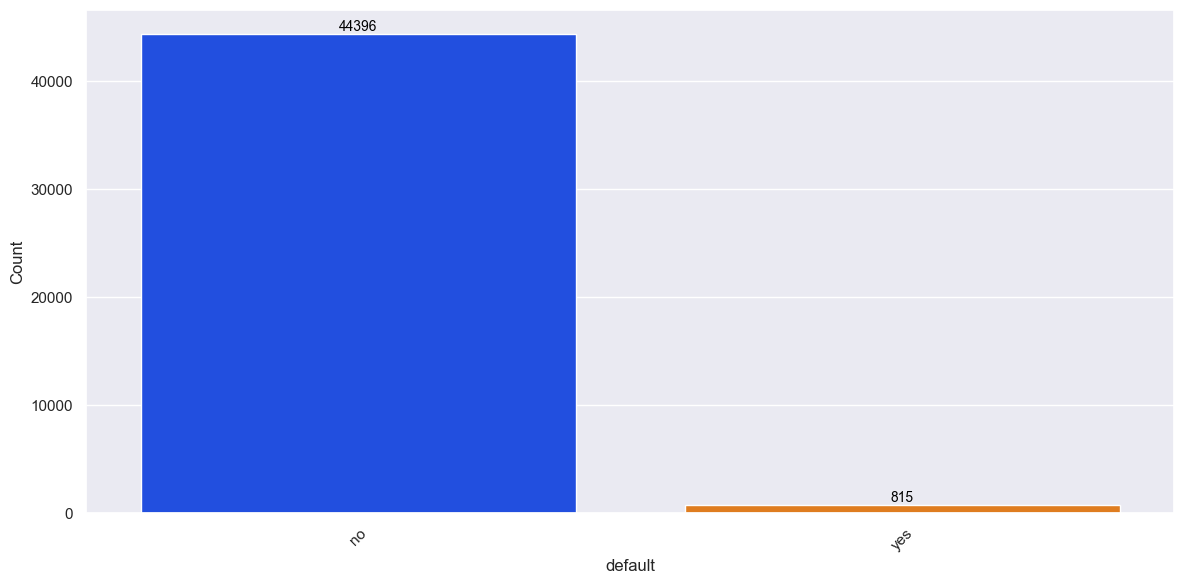

In [44]:
# Barplot of education distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='default', order = df['default'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('default')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Credit Default Status**     
* The vast majority of customers **(44,396)** have **not defaulted** on credit.
* Only a small portion of customers **(815)** have a history of **default**.
* This indicates that **credit default is relatively rare** in the dataset, representing less than **2%** of the total customer base.

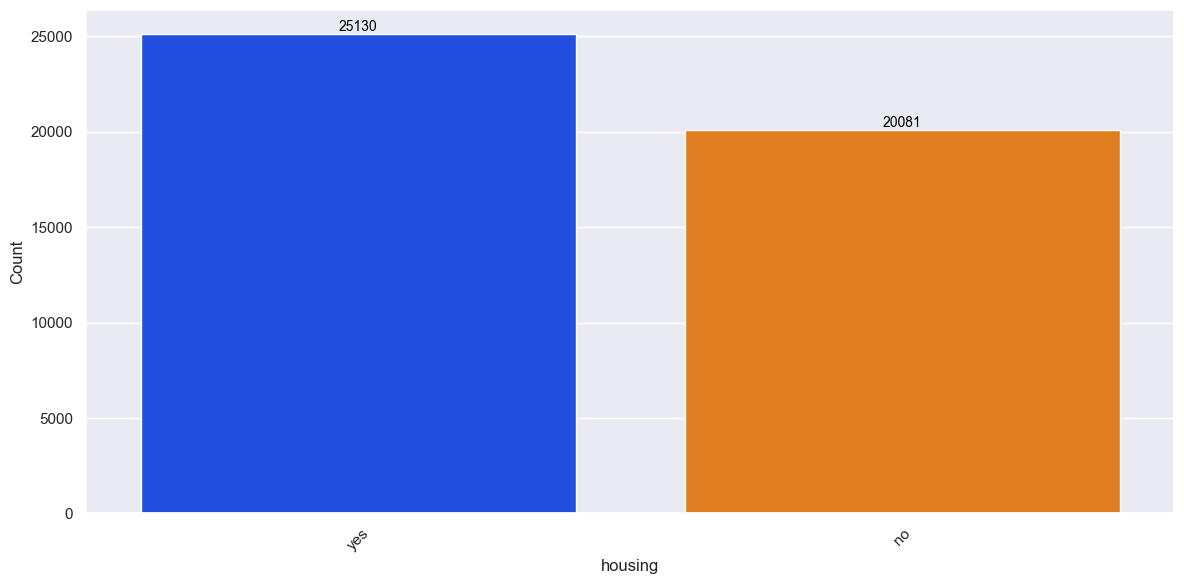

In [46]:
# Barplot of housing distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='housing', order = df['housing'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('housing')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Housing Loan Status**     
* A slightly larger portion of customers **(25,130)** **do not** have a housing loan.
* **20,081** customers **do** have a housing loan.
* This indicates a fairly balanced distribution, with a modest majority of customers not holding housing loans.

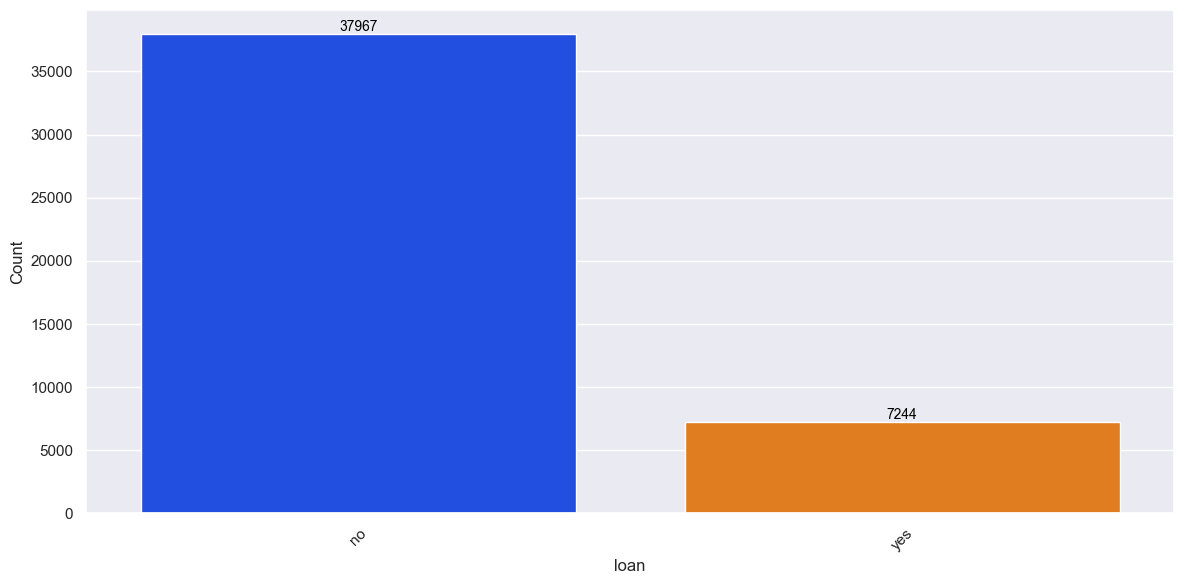

In [48]:
# Barplot of loan distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='loan', order = df['loan'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('loan')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Personal Loan Status**     
* The majority of customers **(37,967) do not** have a personal loan.
* A smaller segment **(7,244 customers) do** have a personal loan.
* This suggests that **personal loans are less common** among the customer base, with approximately **16%** of customers having one.

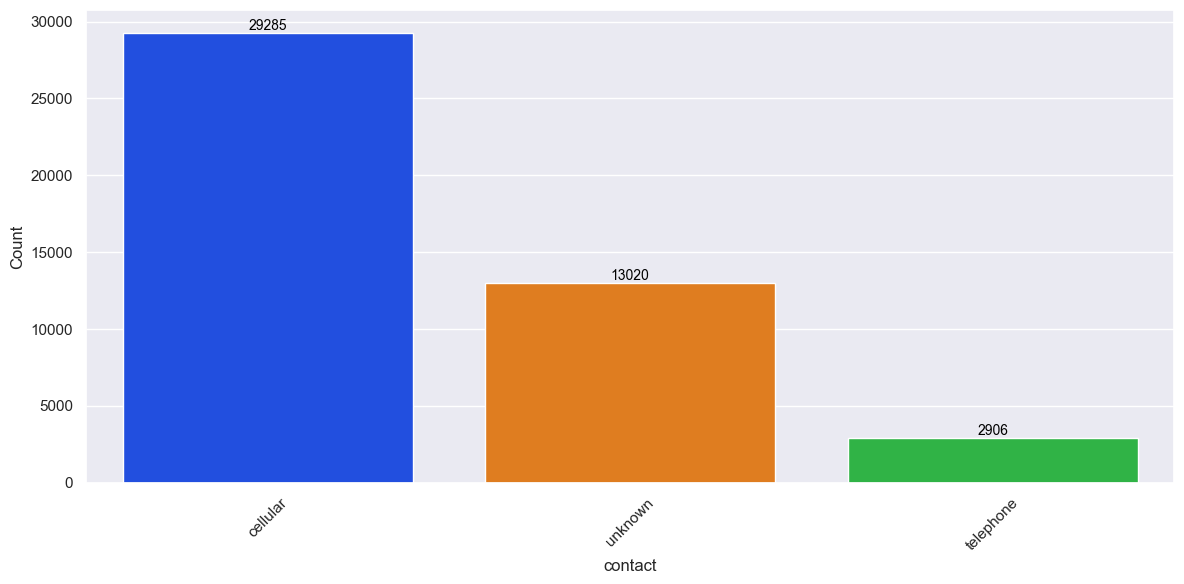

In [50]:
# Barplot of contact distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='contact', order = df['contact'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('contact')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Contact Communication Type**     
* The majority of customers **(29,285)** were contacted via **cellular phones**, making it the most commonly used communication method.
* **13,020** instances are labeled as **unknown**, indicating missing or unspecified contact type.
* **2,906** customers were contacted via **telephone**, which is the least used method in the dataset.
* This suggests a strong preference for mobile communication, while a notable portion lacks clear contact type information.

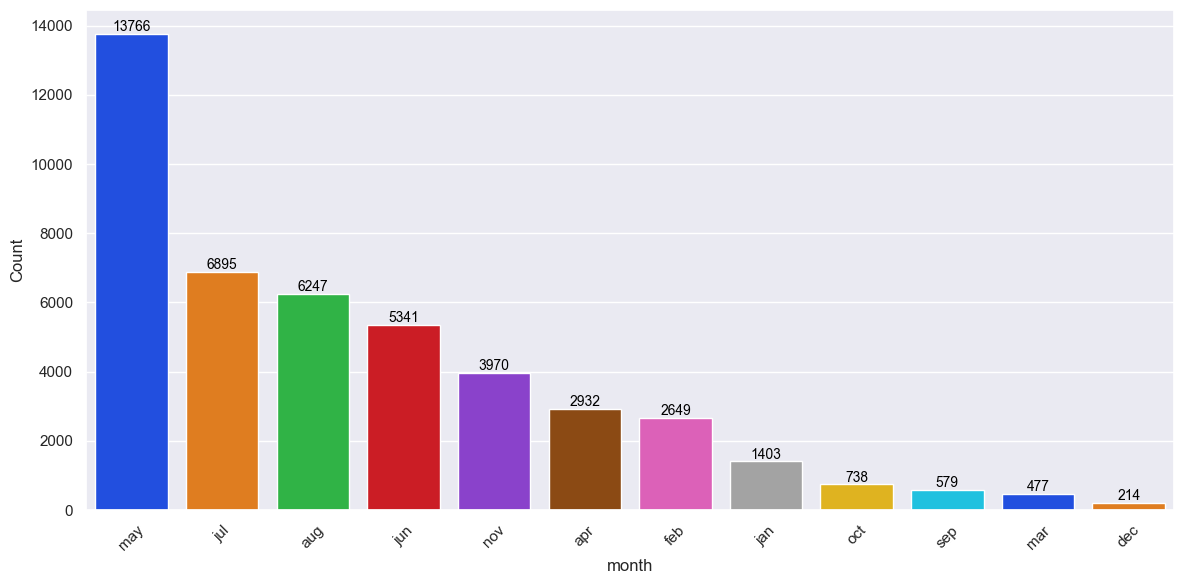

In [52]:
# Barplot of month distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='month', order = df['month'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Month-wise Campaign Distribution**     
* **May** had the highest number of customer contacts, with **13,766** instances, indicating peak campaign activity during this month.
* Other months with significant outreach include **July (6,895)**, **August (6,247)**, and **June (5,341)**.
* **November (3,970)** and **April (2,932)** also saw moderate levels of campaign engagement.
* The least active months were **December (214)**, **March (477)**, and **September (579)**, suggesting minimal campaign efforts during these periods.
* This trend suggests a strong focus on mid-year months for outreach, potentially aligning with marketing strategies or customer availability.

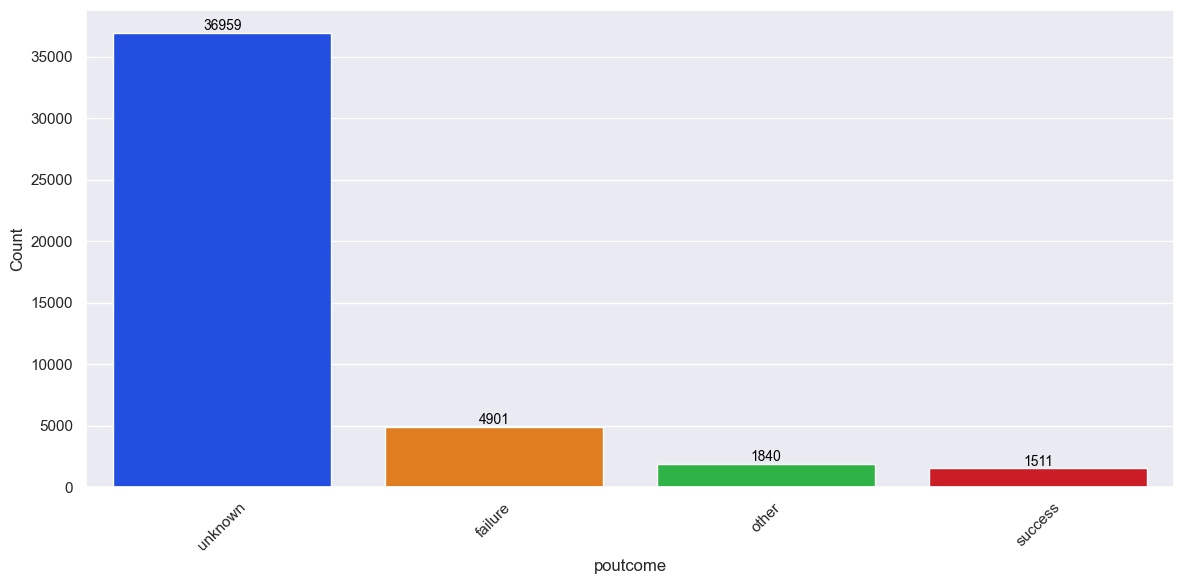

In [54]:
# Barplot of poutcome distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='poutcome', order = df['poutcome'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Previous Campaign Outcome**     
* The majority of entries **(36,959)** have an **unknown** outcome, indicating no prior campaign contact or missing data.
* **4,901** customers had a **failed** outcome in a previous campaign, making it the most common known result.
* A smaller number of customers experienced **other** outcomes **(1,840)** or **success (1,511)**.
* This distribution highlights a **lack of historical campaign data** for a significant portion of customers, which may limit the ability to draw strong conclusions from past campaign performance.

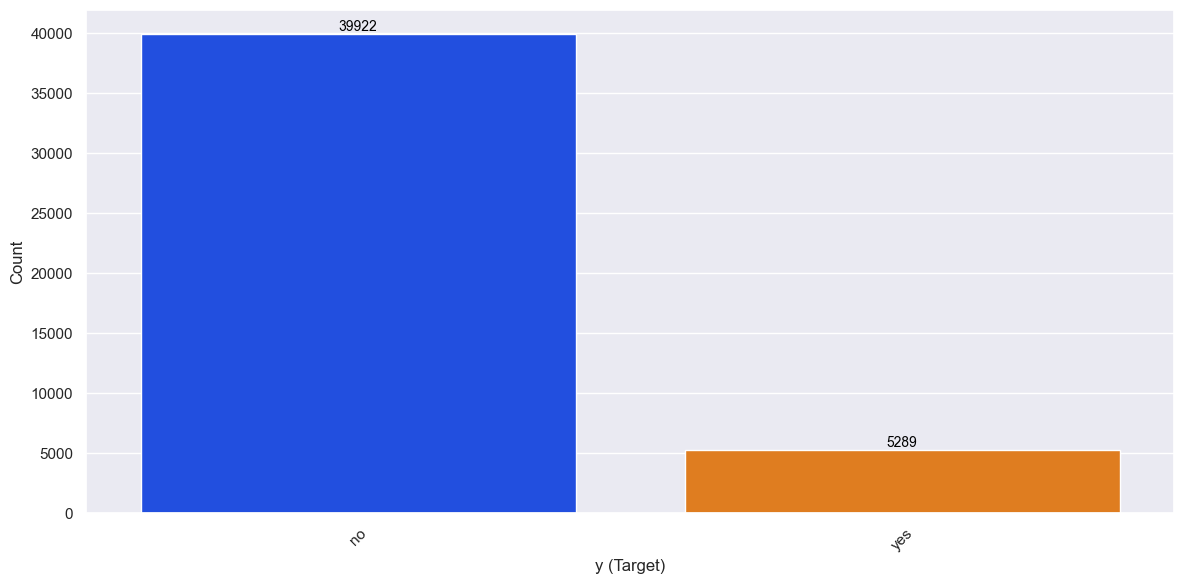

In [56]:
# Barplot of y (Target) distribution 
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = df, x='y', order = df['y'].value_counts().index, palette= 'bright')

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel('y (Target)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Insights on Target Variable (Subscription to Term Deposit)**      
* The majority of customers (**39,922**) **did not subscribe** to the term deposit, indicating a negative response to the campaign.
* A smaller portion (**5,289**) **subscribed**, representing positive responses.
* This indicates a relatively low subscription rate, with approximately **12%** of customers opting in.

In [58]:
## Numerical data

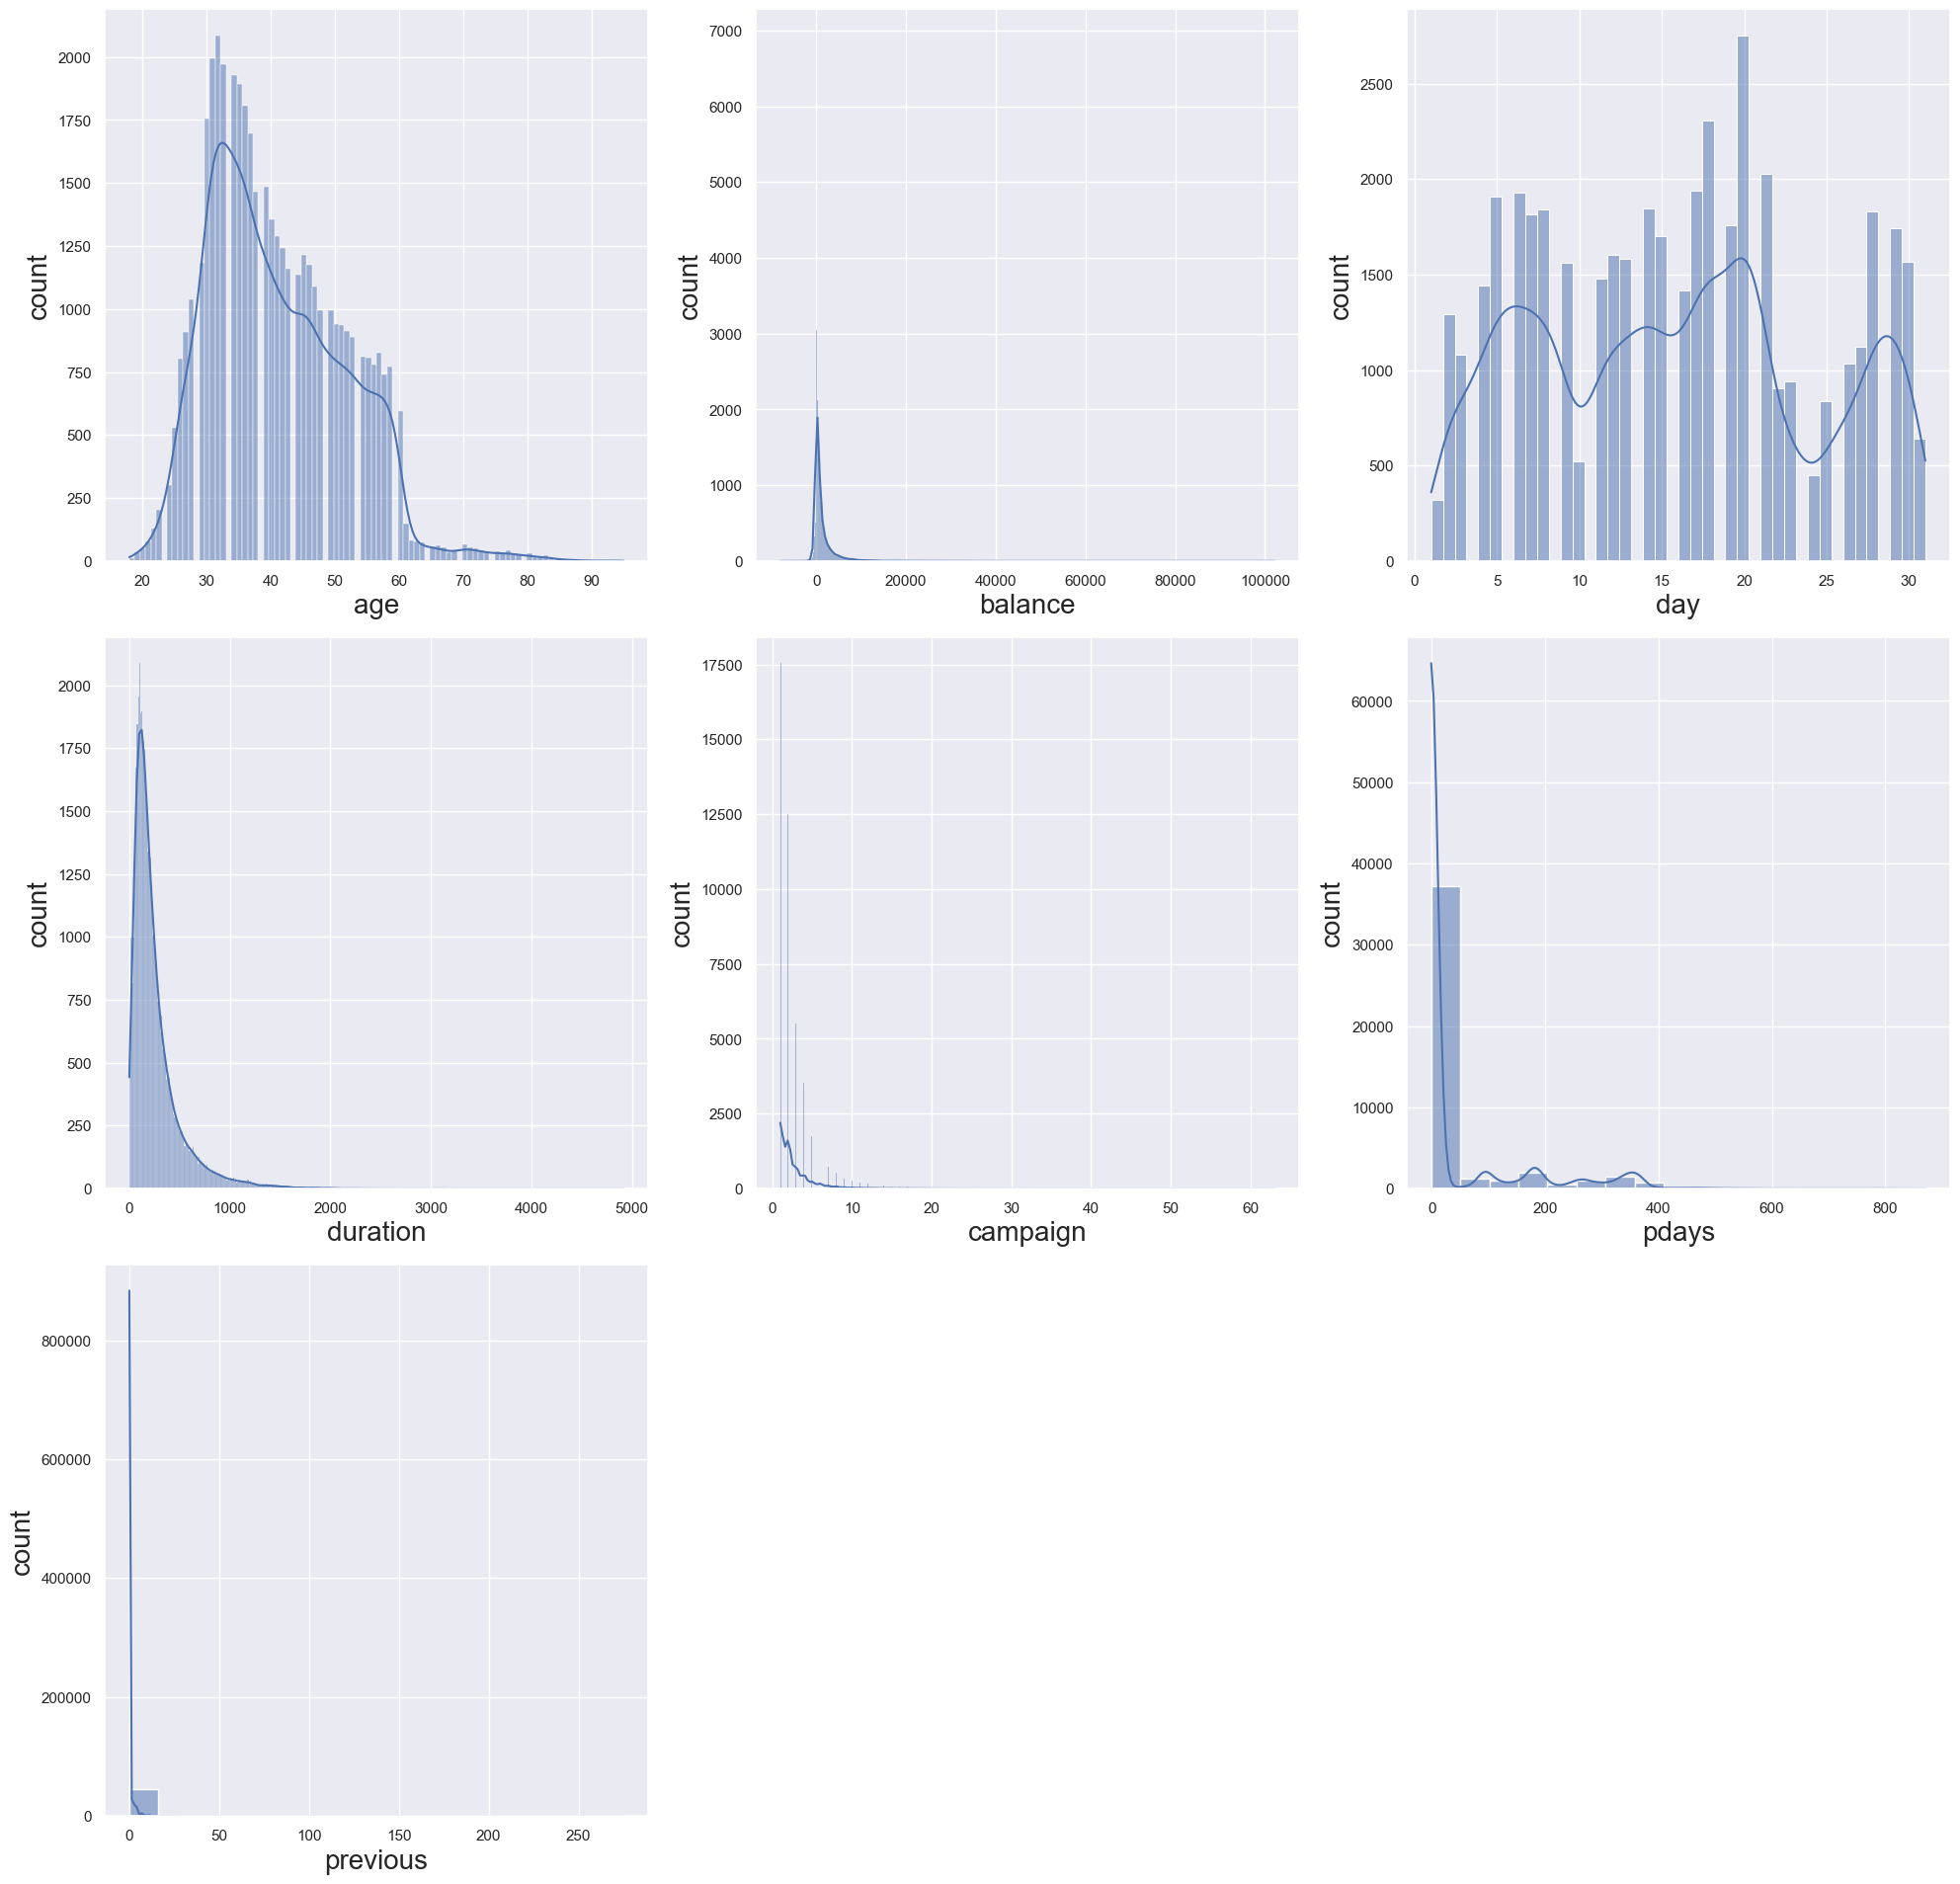

In [59]:
#Histplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in Num_cols:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(x = df[column], kde = True)
    plt.xlabel(column,fontsize = 20)
    plt.ylabel('count',fontsize=20)
    plotnumber +=1
plt.tight_layout()
plt.show()

**Insights**   
  
**1. Age:**    
* The distribution is right-skewed, indicating that most individuals are younger, with a decreasing frequency of older individuals.
* The peak (mode) is around 30-40 years old.    

**2. Balance:**     
* Highly right-skewed, with the majority having a balance near zero.
* A few individuals have significantly higher balances, which might be outliers.    

**3. Day:**
* Fairly uniform distribution, suggesting that calls are made throughout the month without a clear pattern.
* A slight dip around the end of the month.    

**4. Duration:**   
* Extremely right-skewed, with most call durations being very short.
* A few longer calls could indicate successful customer interactions.    

**5. Campaign:**    
* Most individuals are contacted only a few times.
* Very few individuals are contacted more than 10 times, indicating potential saturation.   
    
**6. Pdays:**    
* Right-skewed, indicating many individuals were not previously contacted (value of -1).
* Those contacted have widely varying intervals since last contact.    
    
**7. Previous:**     
* Drastically right-skewed, showing that most individuals have not been previously contacted or contacted very few times.
* Some have been contacted multiple times, suggesting responsiveness or significance.

# **B. Bivariate Analysis**

## **Job**

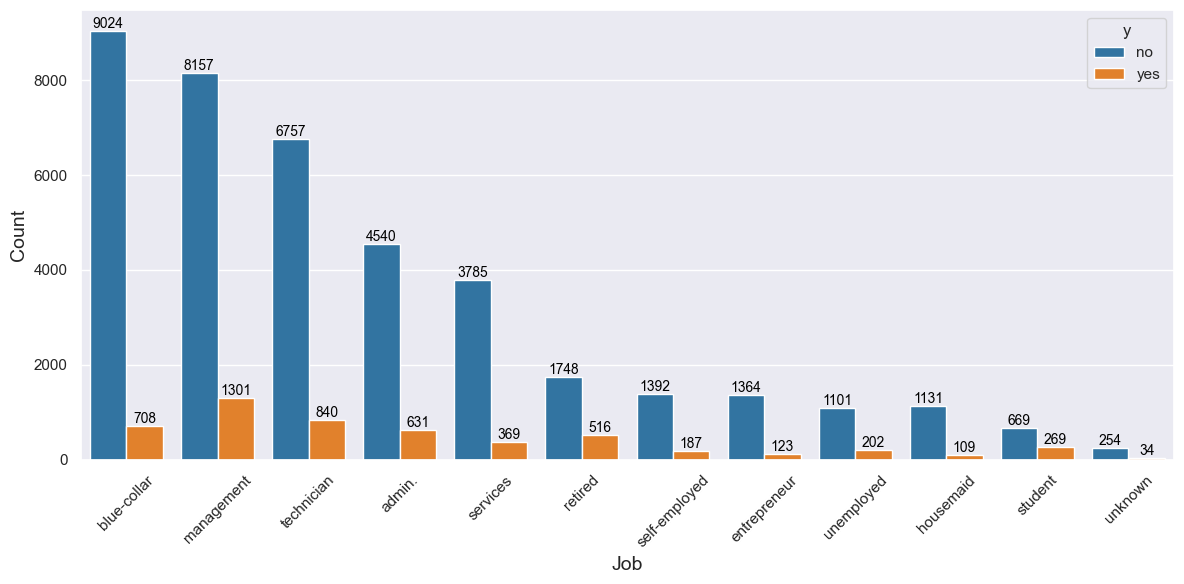

In [63]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'job', hue = 'y', data = df, order = df['job'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Job Distribution and Subscription Analysis**     
* The **blue-Collar Workers**  group has the highest total of non-subscribers, suggesting that marketing efforts may need to be intensified to attract more subscribers from this category.
* While having a high total count,**Management** also shows a significant number of subscribers, indicating a higher likelihood of engagement with subscription offers.
* Despite a large group size, **technician** subscription rates are moderate, offering potential for outreach to increase subscriptions.
* The **administrative** group has a substantial number of non-subscribers, but there is room for growth in subscriptions with targeted campaigns.
* Subscriptions are relatively low across this group, indicating a challenge in converting **service industry workers** into subscribers.
* The **retired group** shows a higher subscription rate compared to their total, suggesting effective engagement strategies or interest in subscriptions among retirees.
* With a low subscription number, **self-employed** group could benefit from customized offers that appeal to entrepreneurial interests and needs.
* **Entrepreneurs** show low subscription rates, indicating a potential market if benefits relevant to this group are highlighted.
* **Unemployed** group has a moderate number of subscribers, which may suggest interest if economic barriers are lowered through special offers.
* The **housemaids** group has low subscription engagement, pointing to an opportunity for tailored communications to raise awareness of subscription benefits.
* **Students** have the highest rate of subscriptions relative to their size, indicating effective outreach or strong interest in subscription products.
* The small size and low subscription number in the **unknown** category suggest that more data might be needed to create effective strategies for this segment.

**Overall Insights**     
* **Targeted Marketing:** There is a clear need for tailored marketing strategies across different job categories, especially for blue-collar workers, service industry employees, and housemaids, where subscription rates are low.
* **High-Potential Segments:** Management, students, and retirees show higher subscription rates, suggesting that current engagement strategies are effective and could be enhanced further to maximize subscriptions.
* **Entrepreneurial Opportunities:** Self-employed individuals and entrepreneurs represent untapped potential. Customized offers that appeal to their specific needs could improve subscription rates.
* **Economic Considerations:** For groups like the unemployed, offering economically viable solutions or special promotions could facilitate higher subscriptions.
* **Data Utilization:** The "unknown" category highlights the need for better data collection and analysis to inform strategic decisions.
* **Engagement Duration:** Investing in engagement strategies that resonate with each segment's unique needs could significantly boost subscription rates across the board.

## **Marital Status**

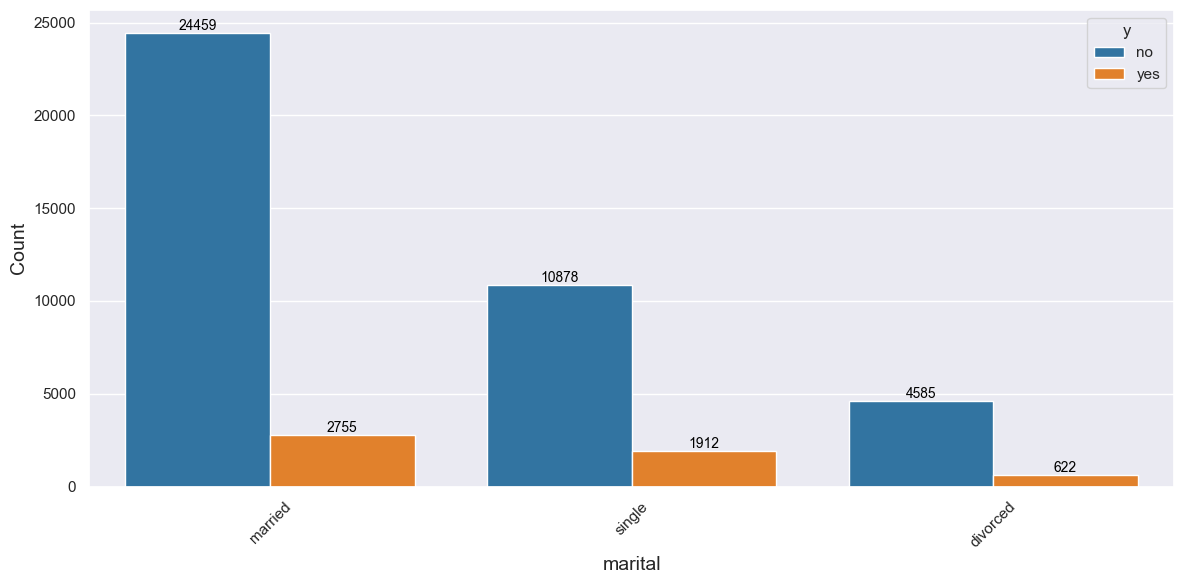

In [66]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'marital', hue = 'y', data = df, order = df['marital'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('marital', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Marital Status Distribution and Subscription Analysis**    

**1. Married**     
* Despite being the largest group, married individuals have a lower subscription rate, suggesting potential barriers or differing priorities that affect their decision to subscribe.

**2. Single**
* Single individuals show a relatively higher inclination to subscribe, indicating that marketing strategies targeting the unique needs and lifestyle of single people could be effective.

**3. Divorced**
* This group has the smallest overall numbers but also the lowest subscription rate, suggesting that targeted engagement could be beneficial in increasing subscriptions.

**Overall Insights:**    
There is an opportunity to tailor marketing and engagement approaches to better target each marital status group, especially focusing on the higher potential among single individuals.

## **Education**

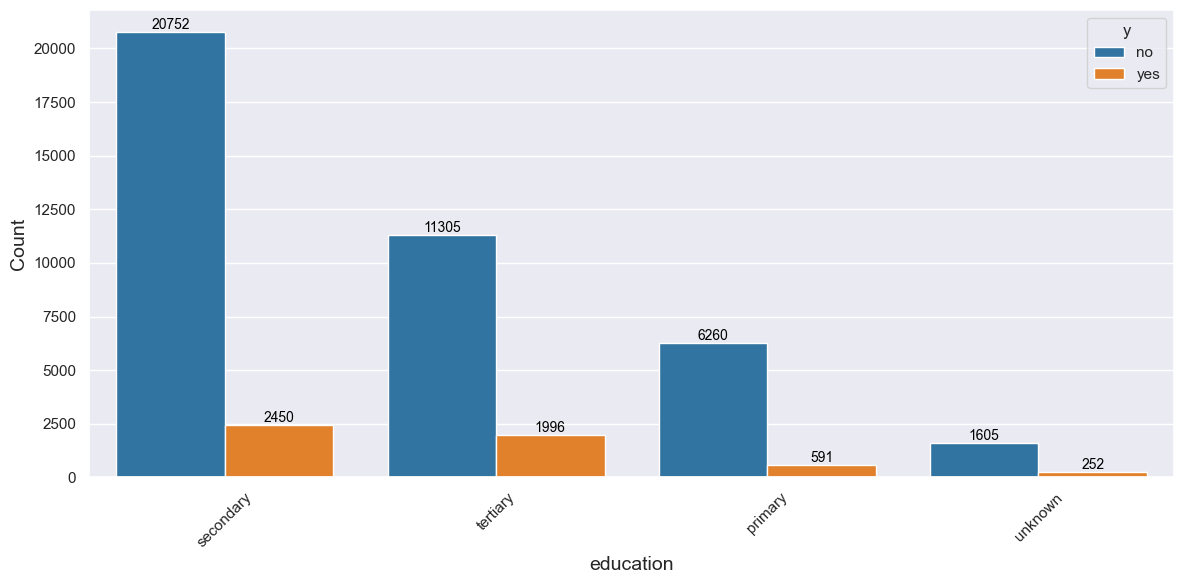

In [69]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'education', hue = 'y', data = df, order = df['education'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Education Status Distribution and Subscription Analysis**    

**1. Secondary Education**    
* Largest group with 20,752 non-subscribers and 2,450 subscribers.
* Indicates moderate engagement with subscription offers.
  
**2. Tertiary Education**     
* Second largest group with 11,305 non-subscribers and 1,996 subscribers.
* Higher education correlates with a relatively higher subscription rate.

**3. Primary Education**
* Smaller group with 6,260 non-subscribers and 591 subscribers.
* Lower subscription numbers suggest less engagement in this educational segment.

**4. Unknown Education**
* Smallest group with 1,605 non-subscribers and 252 subscribers.
* Lack of educational data hampers targeted strategies.
  
**Overall Insights**
* **Targeted Strategies:** Individuals with tertiary education show a higher propensity to subscribe, suggesting benefits tailored to educated segments can enhance subscriptions.
* **Engagement Opportunities:** Enhancing outreach to those with secondary education could improve overall conversion rates given their large population.
* **Data Utilization:** Improved data collection for the unknown category can lead to more effective marketing strategies.
* **Adaptive Messaging:** Tailoring messages to resonate with specific educational backgrounds can optimize engagement across all groups.

## **Default**

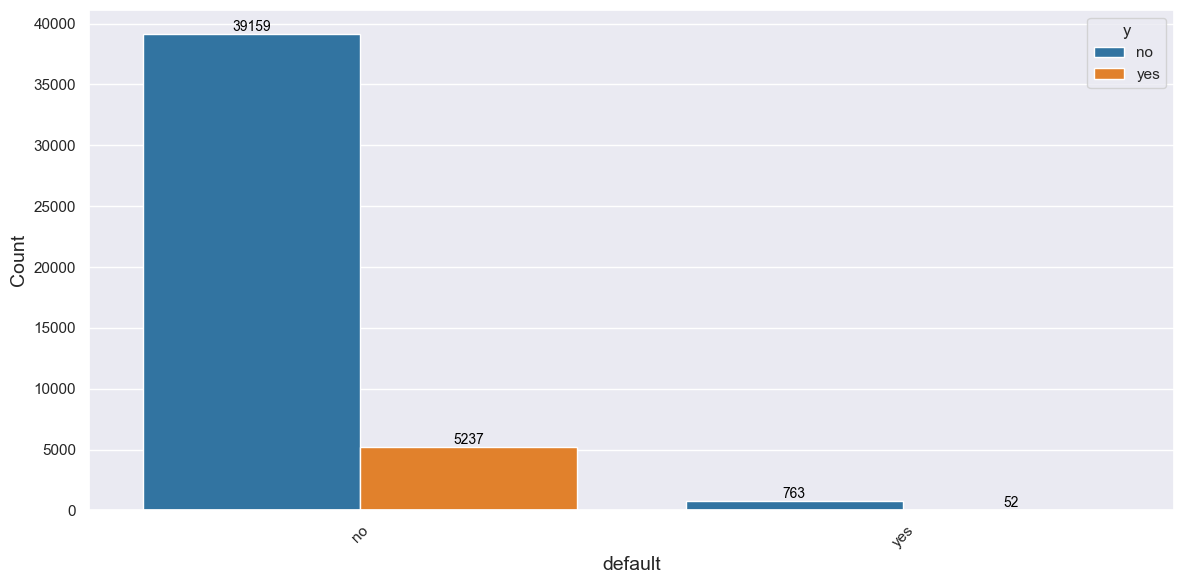

In [72]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'default', hue = 'y', data = df)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('default', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Default Status Distribution and Subscription Analysis**      

**1. No Default**
* The majority, with 39,159 non-subscribers and 5,237 subscribers.
* Indicates strong engagement potential among those without defaults.

**2. Default**
* Very small group with 763 non-subscribers and only 52 subscribers.
* Suggests significant challenges in converting this group into subscribers.
  
**Overall Insights**
* **Credit Status Impact:** Customers without credit defaults are considerably more likely to subscribe, highlighting financial reliability as a key factor in subscription decisions.
* **Targeted Approach:** For individuals with defaults, a specialized approach addressing financial concerns or offering tailored incentives might improve subscription rates.
* **Risk Management:** Understanding the credit background helps in crafting risk-aware marketing strategies that can better address customer needs.
* **Potential for Growth:** The significant number of potential subscribers among those without defaults presents ample opportunity for targeted marketing campaigns.

## **Housing**

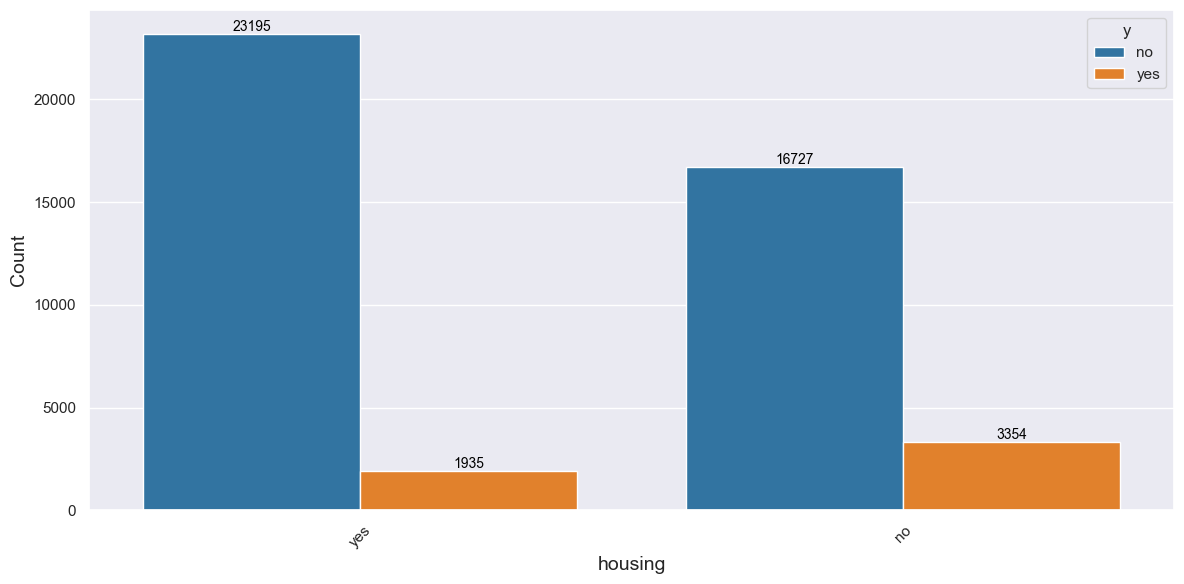

In [75]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'housing', hue = 'y', data = df, order = df['housing'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('housing', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Housing Loan Distribution and Subscription Analysis**      

**Housing Loan (Yes)**    
* Contains 23,195 non-subscribers and 1,935 subscribers.
* Indicates a lower subscription rate among those with housing loans.

**No Housing Loan (No)**
* Includes 16,727 non-subscribers and 3,354 subscribers.
* Suggests a higher likelihood of subscribing without the financial burden of a housing loan.

**Overall Insights**     
* **Financial Burden Impact:** Individuals without housing loans demonstrate a greater propensity to subscribe, highlighting the influence of financial obligations on subscription decisions.
* **Targeted Messaging:** Tailored messages that address or alleviate financial concerns for those with housing loans might enhance subscription rates.
* **Opportunity for Growth:** The substantial number of potential subscribers among individuals without housing loans presents a strategic opportunity for targeted marketing efforts.

## **Loan**

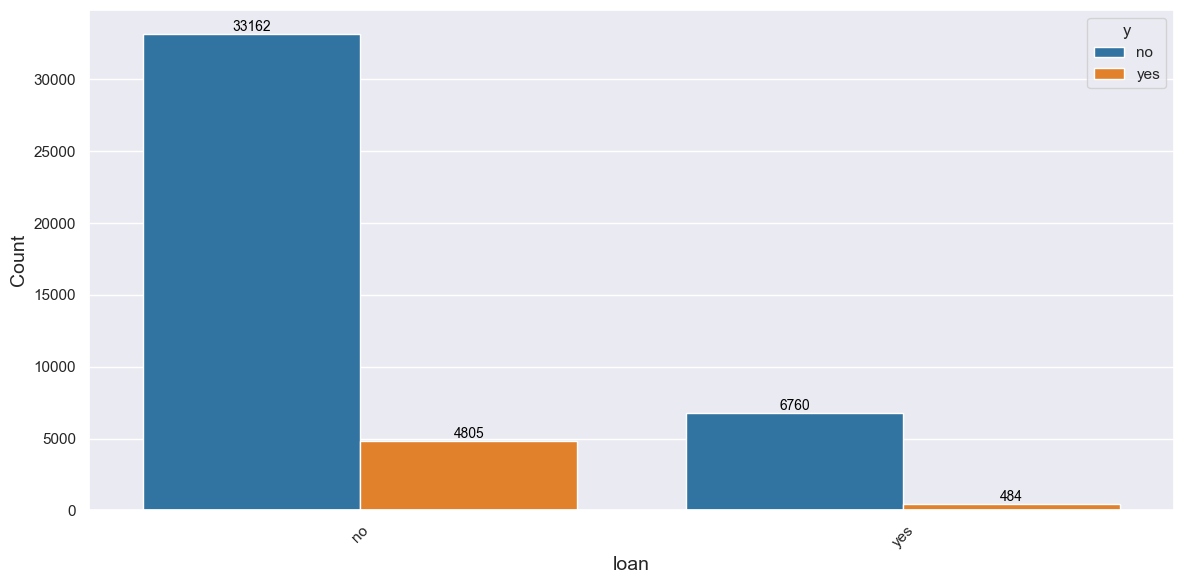

In [78]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'loan', hue = 'y', data = df, order = df['loan'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Personal Loan Distribution and Subscription Analysis**    

**No Personal Loan**
* A large group with 33,162 non-subscribers and 4,805 subscribers.
* Indicates higher subscription rates among those without personal loans.

**With Personal Loan**
* Smaller group with 6,760 non-subscribers and only 484 subscribers.
* Suggests lower engagement and conversion to subscriptions among those with personal loans.

**Overall Insights**
* **Financial Constraints:** Individuals with personal loans exhibit lower subscription rates, likely due to financial constraints impacting their ability to commit to new subscriptions.
* **Targeted Solutions:** Offering financial incentives or specifically tailored packages might improve subscription rates for individuals with existing personal loans.
* **Growth Opportunity:** The significant number of unsubscribed individuals without personal loans shows potential for strategic marketing, emphasizing the benefits of subscriptions without additional financial burden.

## **Contact**

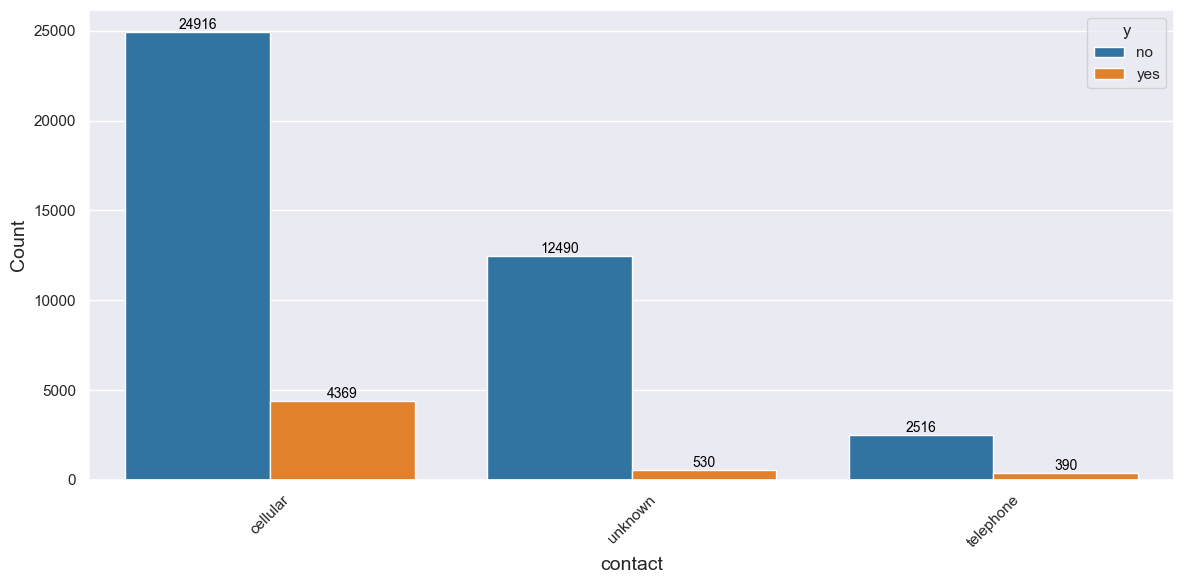

In [81]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'contact', hue = 'y', data = df, order = df['contact'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('contact', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Contact Details Distribution and Subscription Analysis**     

**1. Cellular Contact**
* Largest group with 24,916 non-subscribers and 4,369 subscribers.
* Shows a higher subscription rate, suggesting effective engagement through mobile channels.

**2. Unknown Contact Method**
* Includes 12,490 non-subscribers and 530 subscribers.
* Lower subscription rates indicate limited effectiveness or potential data issues.

**3. Telephone Contact**    
* Smallest group with 2,516 non-subscribers and 390 subscribers.
* More limited engagement compared to cellular, indicating less effectiveness.

**Overall Insights**
* **Effectiveness of Channels:** Cellular contact is the most effective method for gaining subscriptions, demonstrating the importance of leveraging mobile engagement.
* **Data Quality:** The "unknown" category suggests a need for improved data collection and management to better strategize engagement efforts.
* **Diverse Strategies:** Emphasizing mobile communication while exploring enhancements in telephone strategies can optimize subscription conversions.
* **Targeted Approaches:** Leveraging the success of cellular contacts, tailored campaigns should focus on improving reach and clarity to maximize engagement across all contact methods.

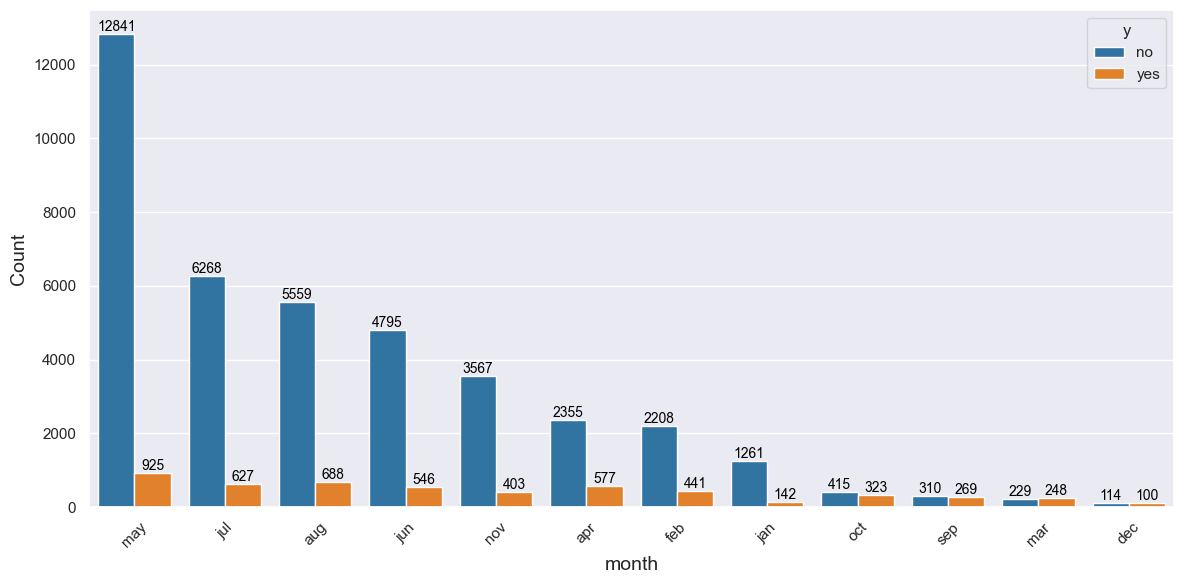

In [83]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'month', hue = 'y', data = df, order = df['month'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Month-wise Distribution and Subscription Analysis**    

**1. May**
* Largest number of non-subscribers (12,841) and a significant number of subscribers (925).
* High activity month, but with a relatively low subscription rate.

**2. July and August**
* High numbers of non-subscribers (6,268 in July, 5,559 in August) but moderate subscription levels.
* Potential for increased engagement through targeted strategies.

**3. June**
* Substantial non-subscribers (4,795) with moderate subscription rate (546).
* Indicates moderate interaction effectiveness.

**4. Other Months**
* Lower engagement levels, with November, April, and February having some variations in subscription rates.
* December has the lowest overall activity.

**Overall Insights**
* **Seasonal Patterns:** May, July, and August are high-contact months; however, the conversion rate into subscriptions is lower, suggesting a review of outreach strategies during these months could be beneficial.
* **Engagement Timing:** Tailoring strategies to leverage months with higher customer interaction, like May, can optimize subscription conversions.
* **Year-End Strategy:** Lower engagement in months like December indicates an opportunity to devise new strategies for year-end campaigns to boost subscriptions.
* **Optimization Opportunity:** Reevaluating marketing efforts particularly in months with lower conversion rates can unlock potential for increased subscription rates year-round.

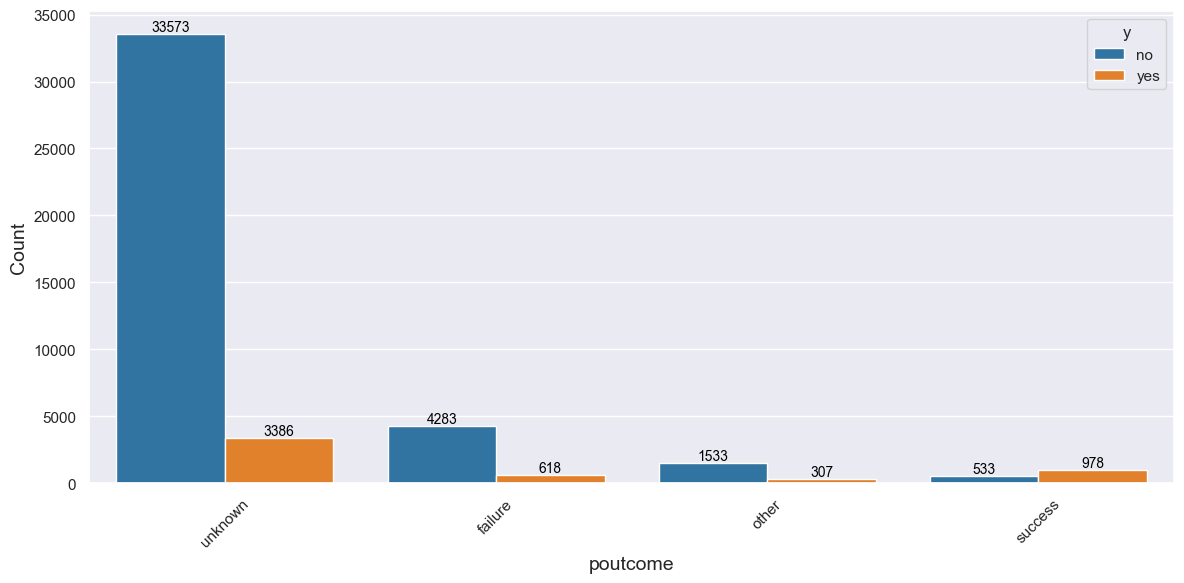

In [85]:
plt.figure(figsize=(12, 6), facecolor='white')
custom_palette = ["#1f77b4", "#ff7f0e"]  

sns.set_palette(custom_palette)
ax = sns.countplot(x = 'poutcome', hue = 'y', data = df, order = df['poutcome'].value_counts().index)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
         ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('poutcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Poutcome Distribution and Subscription Analysis**    

**1. Unknown Outcome**
* Largest category, with 33,573 non-subscribers and 3,386 subscribers.
* Indicates a substantial portion of data lacks information on previous campaign outcomes.

**2. Failure**
* Includes 4,283 non-subscribers and 618 subscribers.
* Conversion rate is low, as expected, given past unsuccessful interactions.

**3. Other**
* Smaller segment with 1,533 non-subscribers and 307 subscribers.
* Highlights mixed results or possibly unconventional outcomes.

**4. Success**
* Despite being the smallest category, it has the highest subscription rate with 978 subscribers compared to 533 non-subscribers.
* Reinforces the positive momentum from successful past interactions.

**Overall Insights**
* **Data Gaps:** The high number of unknown outcomes suggests a need for better tracking and documentation of previous campaign results to inform future strategies.
* **Previous Success Influence:** A successful past campaign significantly boosts future subscription likelihood, underscoring the value of maintaining successful interactions.
* **Strategic Adjustments:** Understanding and learning from past failures can help refine approaches and mitigate repeat mistakes, while strategies that capitalize on past successes should be expanded.
* **Comprehensive Analysis:** Detailed analysis of the "other" category could uncover specific factors contributing to mixed outcomes and offer strategic insights.

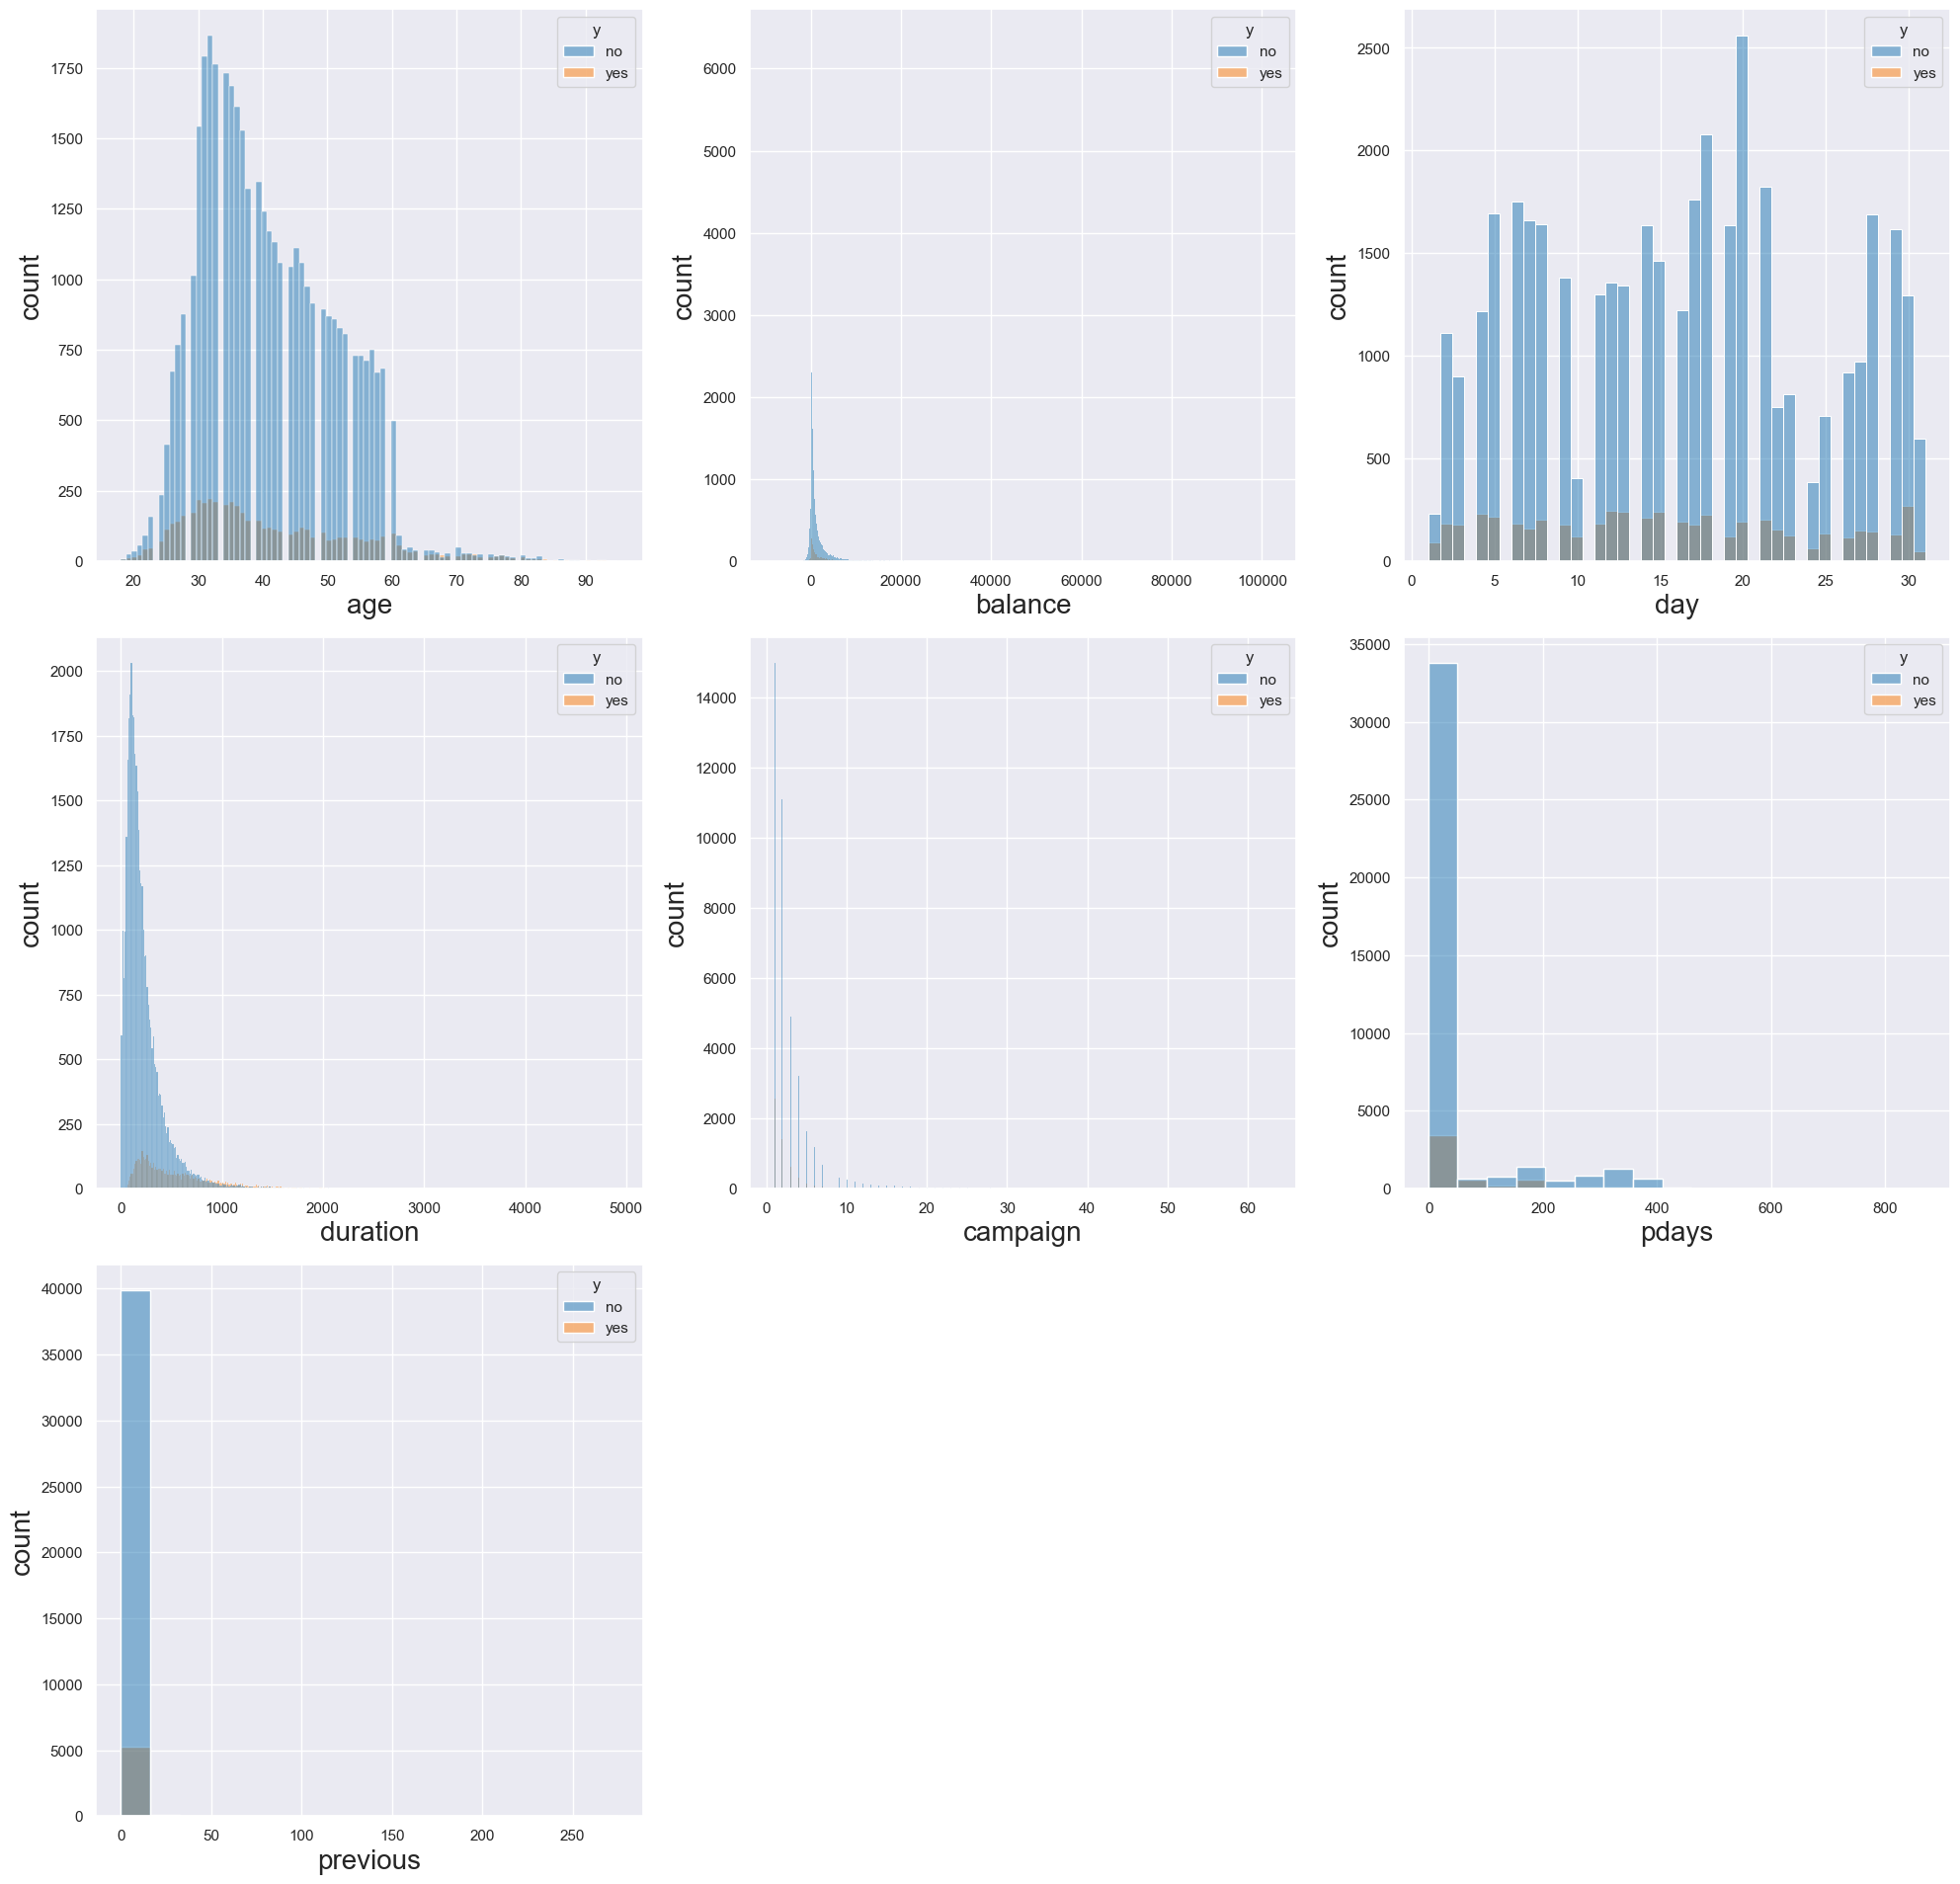

In [87]:
#histplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in Num_cols:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(x = df[column],hue = df['y'])
    plt.xlabel(column,fontsize = 20)
    plt.ylabel('count',fontsize = 20)
    plotnumber +=1
plt.tight_layout()
plt.show()

**Distribution and Subscription Analysis for Each Category**     

**1. Age:**    
* Distribution: Age is right-skewed, with most individuals between 20 and 60 years old.
* Subscriptions ("yes") are more common among younger age groups, especially those in their 30s and 40s.

**2.Balance:**   
* Distribution: Highly skewed, with most balances clustered around low values.
* A few high-balance accounts show subscriptions, but the majority with low balance are not subscribed.
  
**3. Day:**   
* Distribution: Fairly even distribution across days 1 to 31, with slight variations.
* Subscription rates remain consistent throughout the month, indicating that the specific day of contact does not significantly impact the likelihood of subscription.

**4. Duration:**   
* Distribution: Strong right skew, indicating most calls are short in duration.
* Longer call durations correlate with a higher likelihood of subscriptions.
  
**5. Campaign:**   
* Distribution: Majority of customers have been contacted only a few times.
* Higher subscription rates with fewer campaign contacts, declining with more contacts.
  
**6. Pdays:**    
* Distribution: Most values are at zero, indicating these customers were not previously contacted.
* Few subscriptions among those previously contacted after extended periods (non-zero pdays).

**7. Previous:**   
* Distribution: Most customers have not been previously contacted.
* Low subscription rates even among those previously contacted, might indicate diminishing returns with repeated contacts.

# **C. Mutlivariate Analysis**

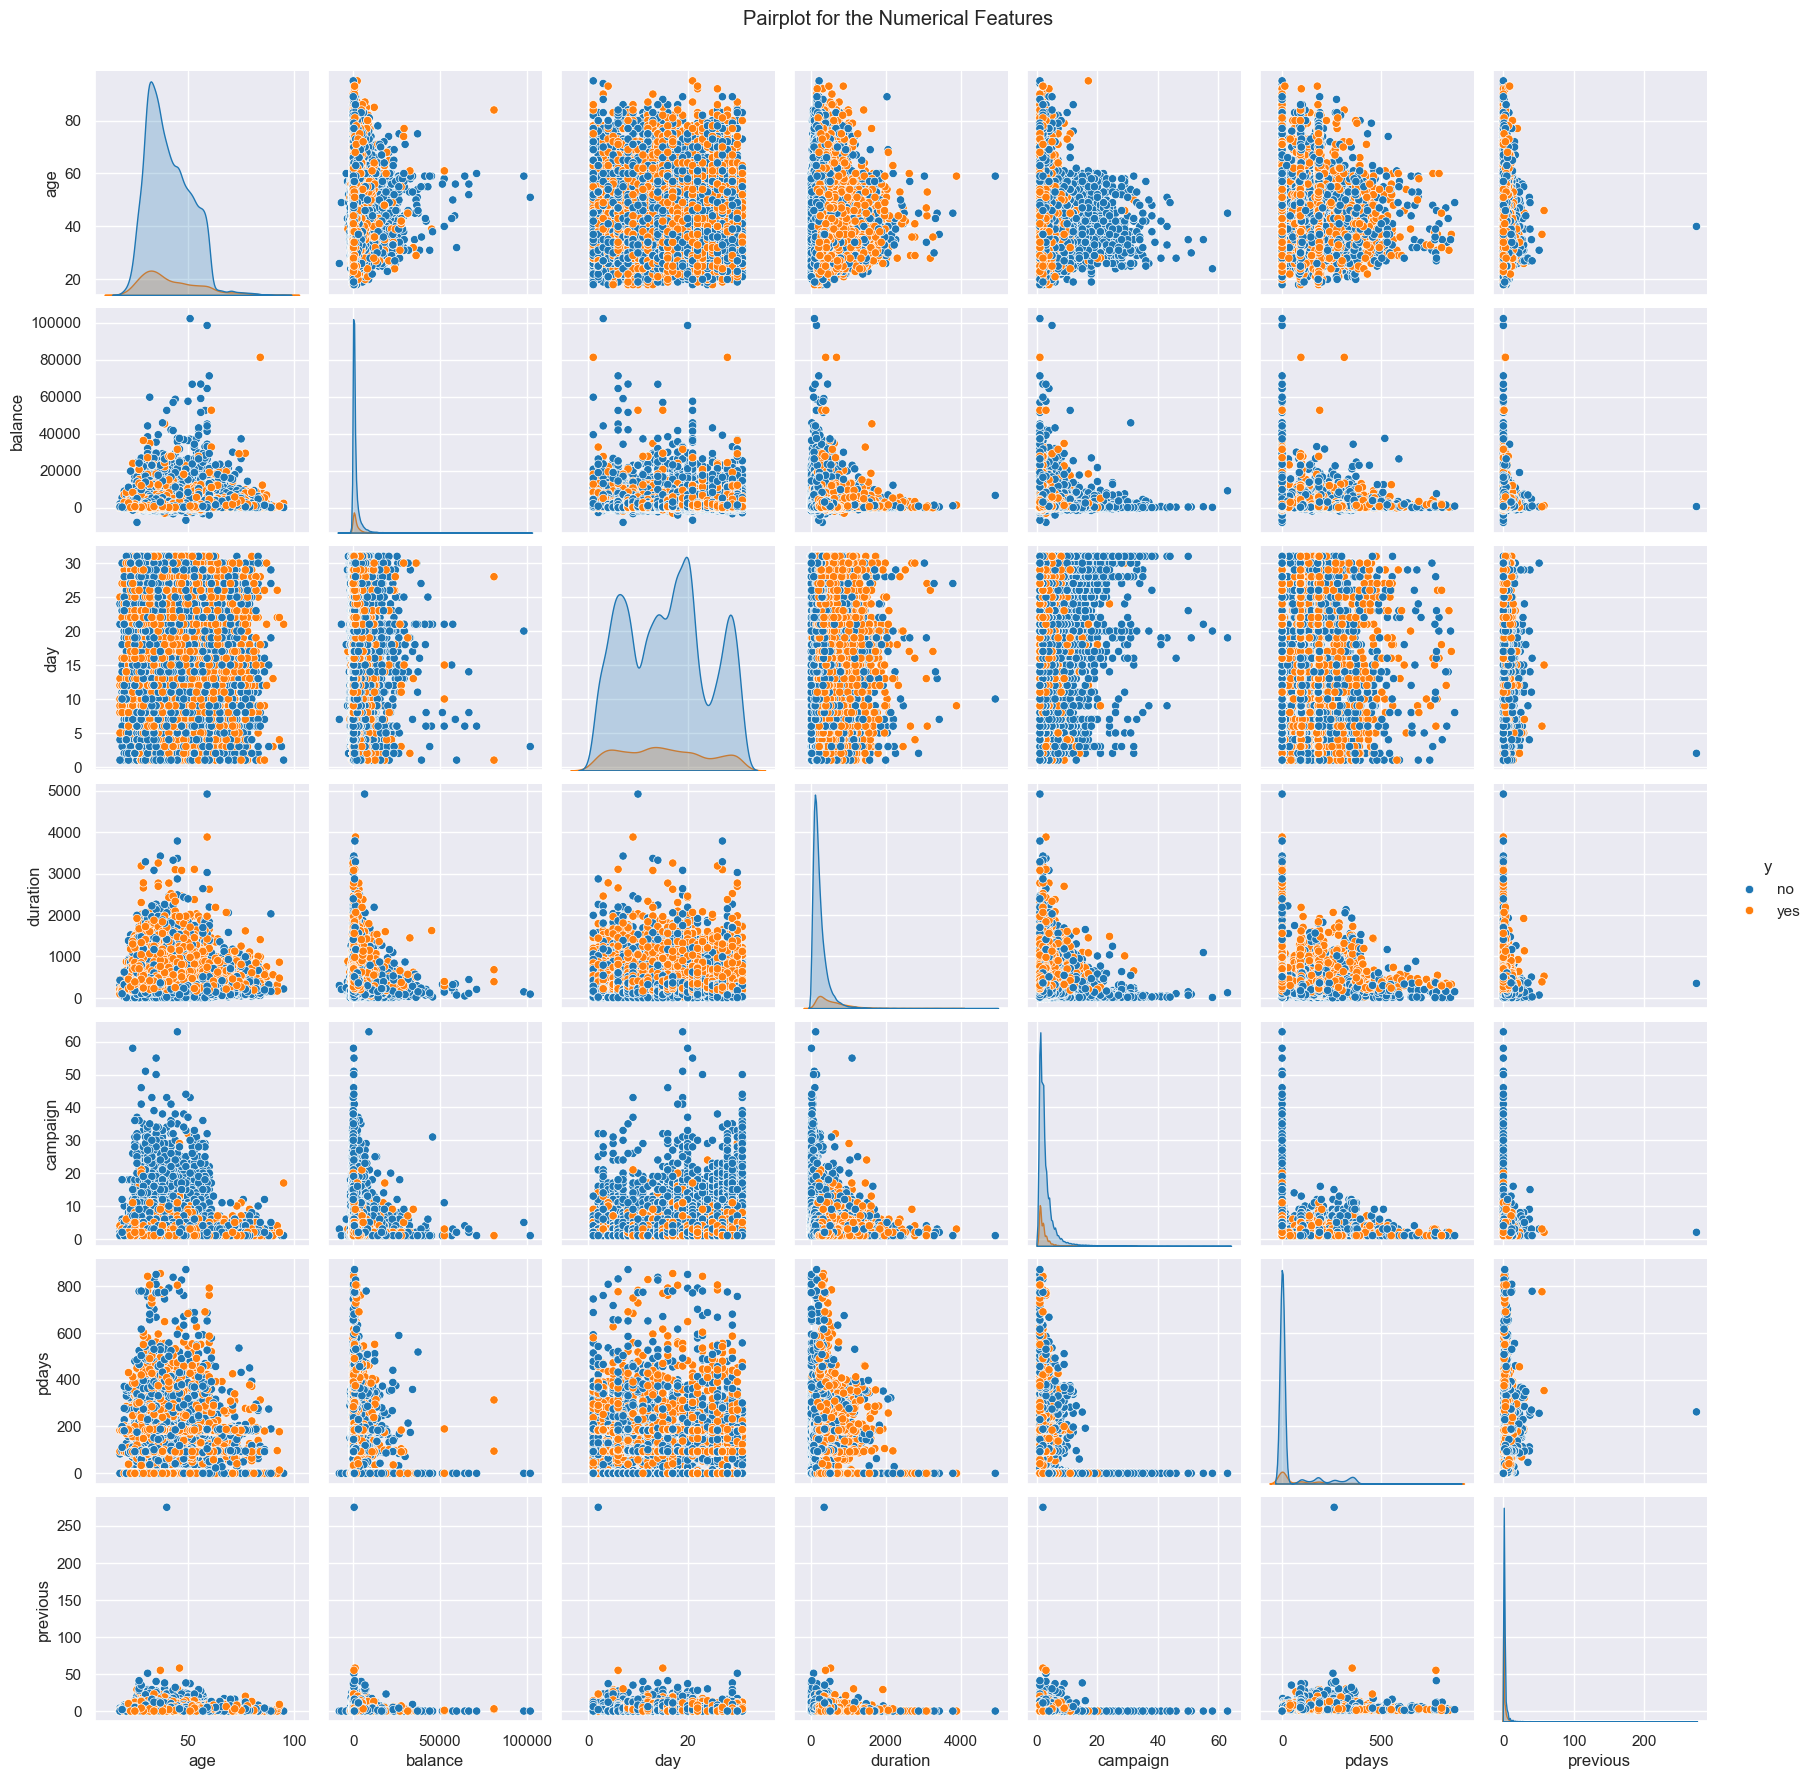

In [90]:
#pairplot
sns.pairplot(df,hue='y')
plt.suptitle('Pairplot for the Numerical Features', y=1.02)
plt.show()

**Multivariate Analysis Observations and Insights**  
* **Age vs. Balance:** There's no clear linear relationship, but a higher balance appears more common among subscribers (orange).
* **Duration:** Longer call durations consistently show a higher likelihood of subscription, as seen with more orange points in higher duration areas.
* **Age:** Younger age groups have more subscriptions, seen in higher density of orange points.
* **Campaign:** Shows a spread, but not a clear pattern linking the number of contacts to subscriptions.
* **Pdays:** Shorter times from last contact show more subscriptions, with a notable cluster of orange points near the lower pdays.
* **Balance vs. Duration:** Higher balances combined with longer durations show more subscriptions, indicating these factors might jointly influence outcomes.
* **Balance vs. Pdays:** A high account balance along with short pdays appears to correlate with increased subscriptions.
* **Balance vs. Campaign:** No significant pattern, but potential for further analysis on how financial stability intersects with contact frequency.
* **Previous Contacts:** Higher numbers of previous contacts generally show more non-subscriptions, but successful conversion is still visible with the right balance of other factors.

**Overall Insights**
* **Call Duration:** A longer duration strongly correlates with subscription, suggesting the importance of engagement time with potential customers.
* **Financial Indicators:** High balance shows some correlation with subscription, indicating financial stability supports customer conversion.
* **Contact Recency:** Shorter pdays are associated with higher subscription rates, emphasizing the importance of timely follow-ups.
* **Cross-Feature Patterns:** Some cross-feature relationships suggest optimizing contact timing and duration in campaigns can increase subscriptions.
* **Diverse Strategies:** The diversity in data patterns across different features indicates the need for a multi-faceted approach to improve overall subscription rates, focusing on key predictors like duration and age.

# **Correlation Matrix**

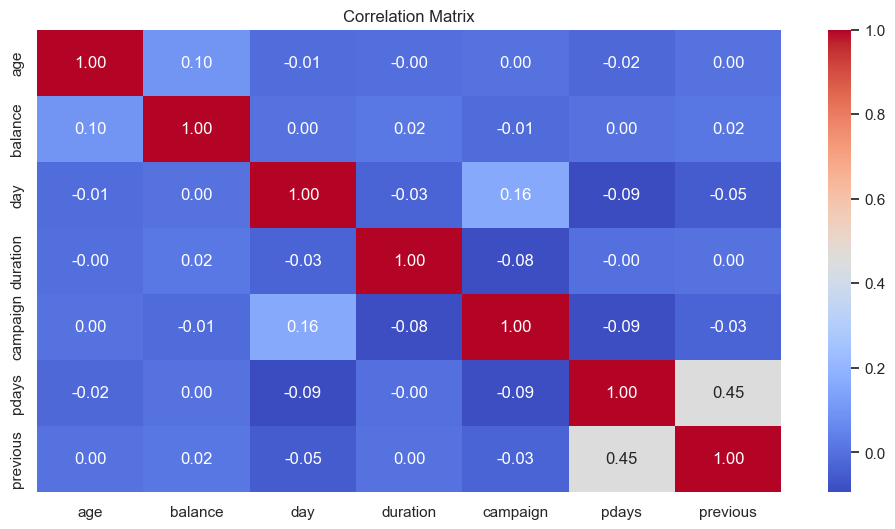

In [93]:
corr_matrix = df.corr(numeric_only=True)

# Visualize
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **5️⃣ Outlier Detection**

In [95]:
# creating new data frame of numerical columns 
df_numerical = df[Num_cols]
print('Shape of numerical dataframe {}'.format(df_numerical.shape))
df_numerical.head()

Shape of numerical dataframe (45211, 7)


age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

In [96]:
q3 = df_numerical.quantile(0.75)
q1 = df_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [97]:
data_out = df[~((df_numerical < (q1 - 1.5 * iqr)) |(df_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))

17018 points are outliers based on IQR


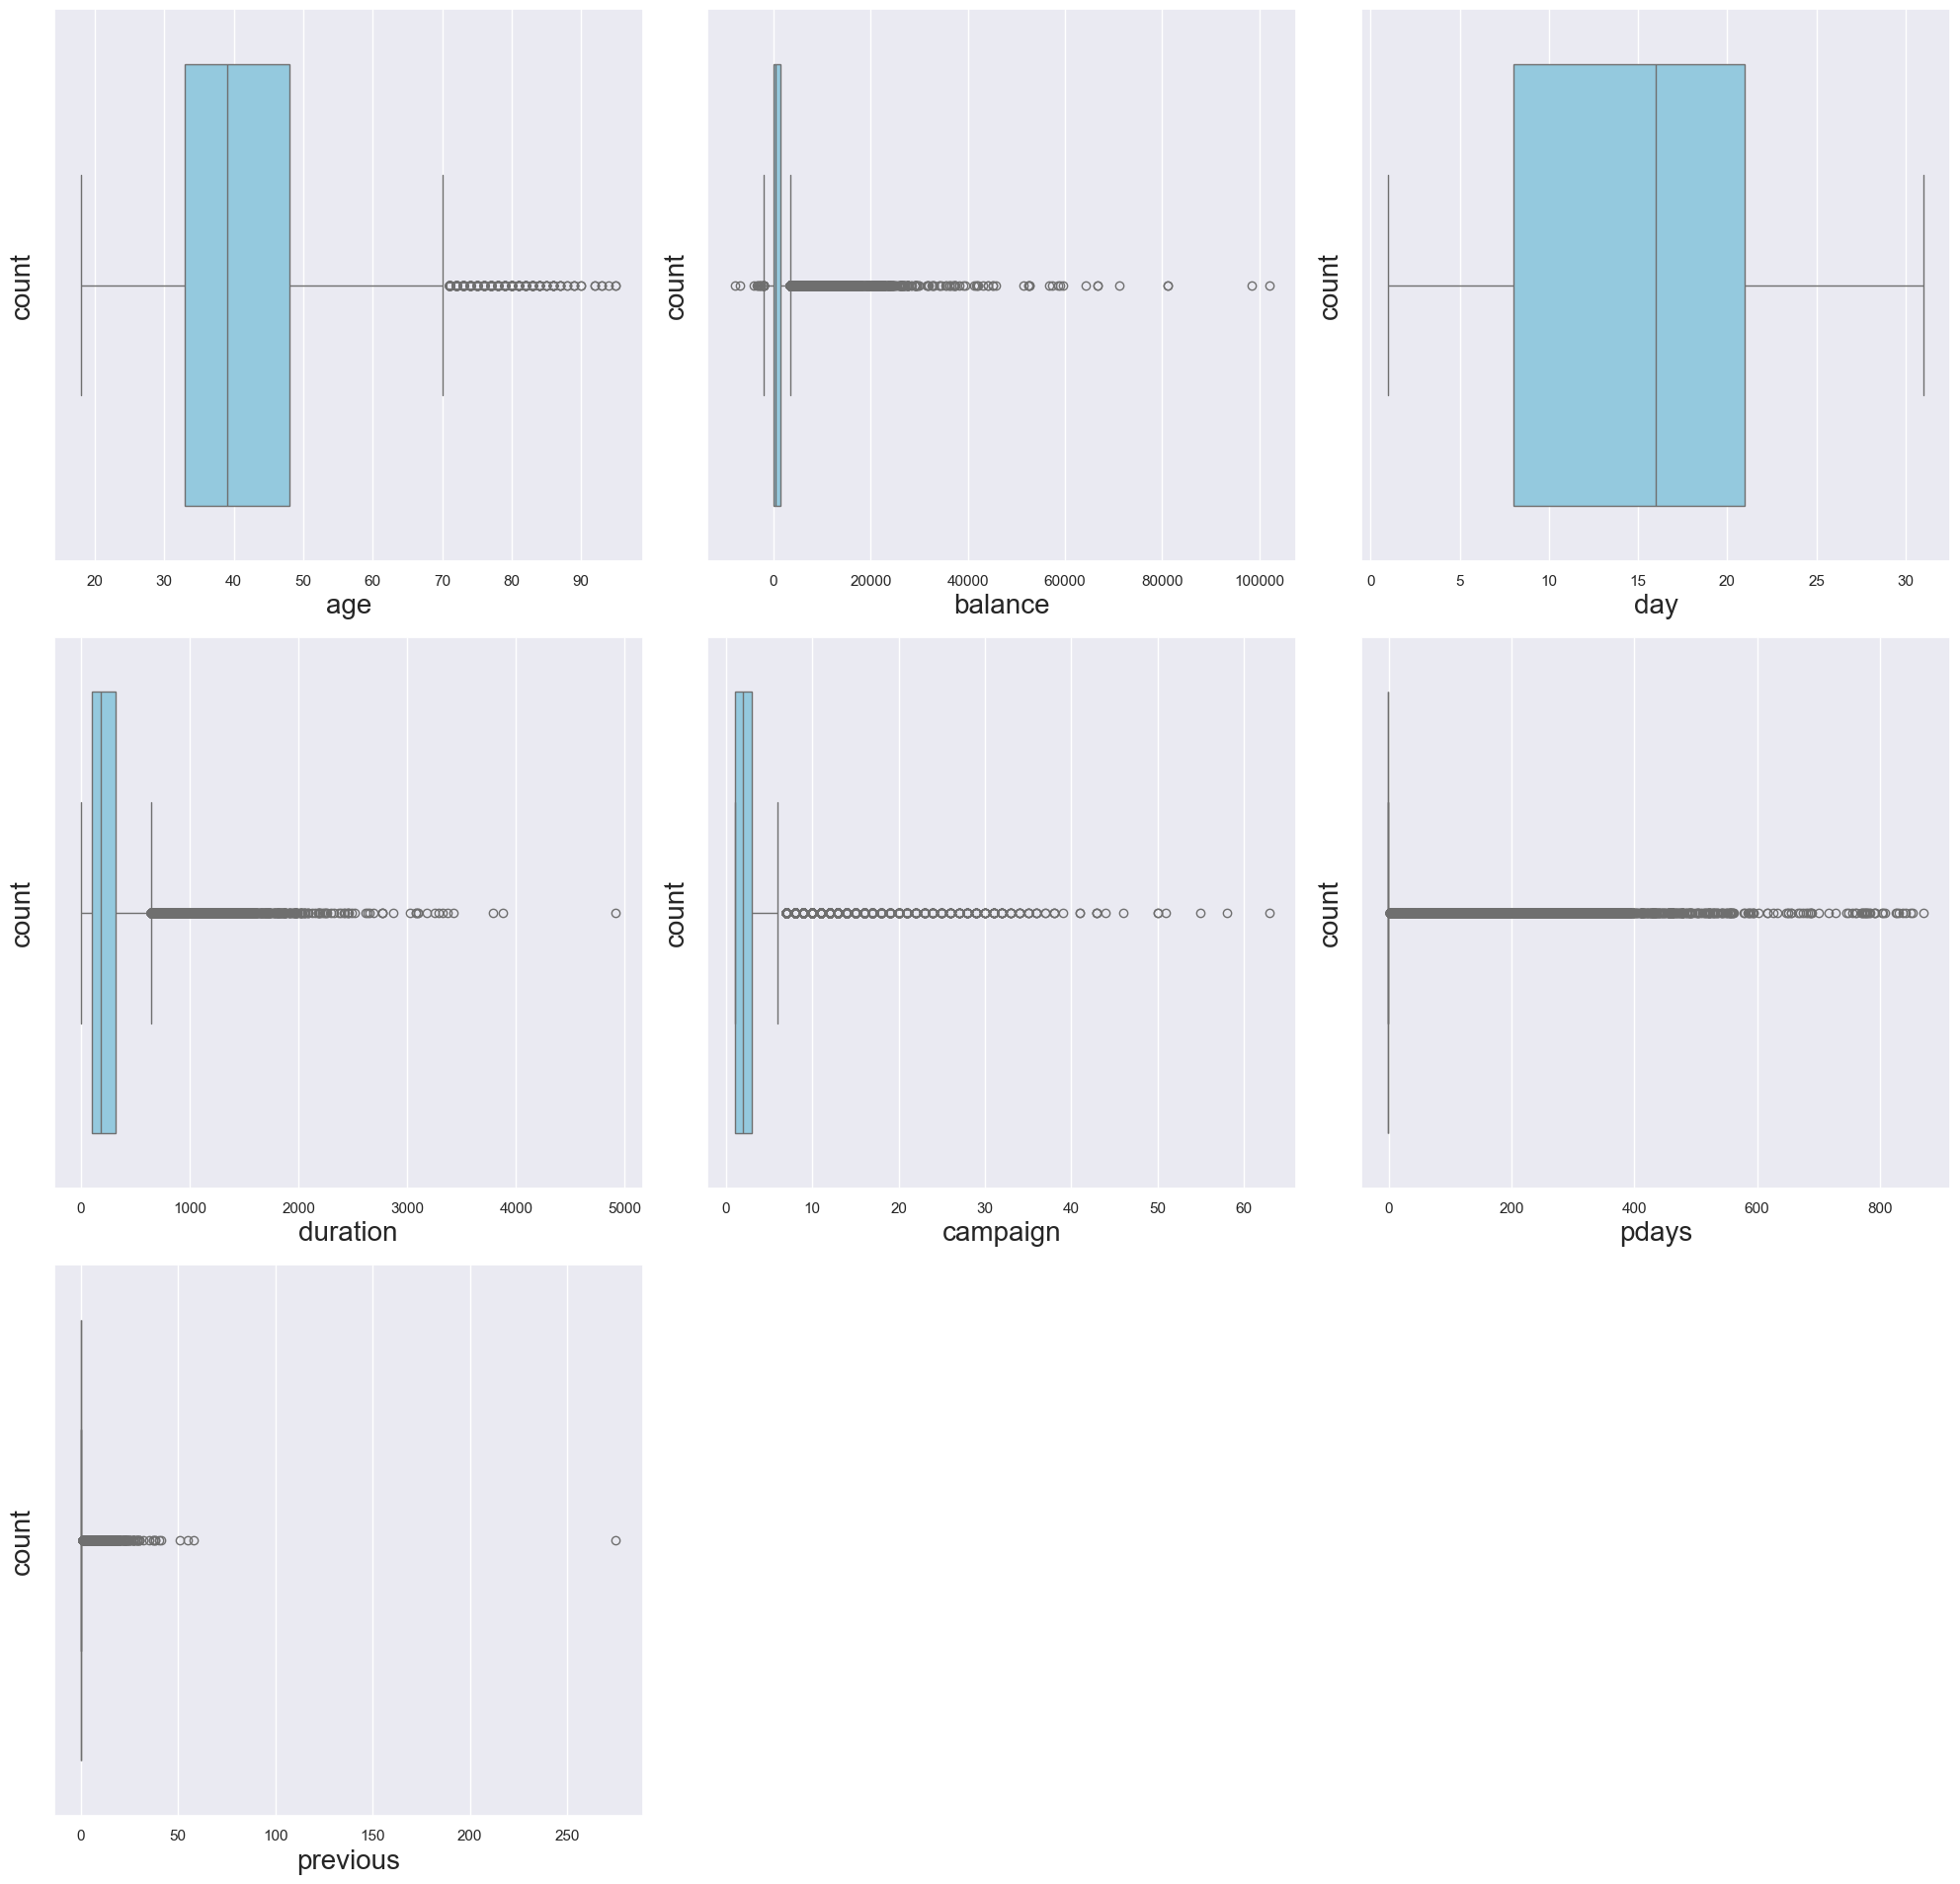

In [98]:
#Boxplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in Num_cols:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(x = df[column], color='skyblue')
    plt.xlabel(column,fontsize = 20)
    plt.ylabel('count',fontsize = 20)
    plotnumber += 1
plt.tight_layout()
plt.show()

## **Age**

In [100]:
# Finding Outlier in Age
Q1 = df['age'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['age'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : 33.0
upper quantile : 48.0
IQR : 15.0
lower_limit : 10.5
upper_limit : 70.5


In [101]:
# find the values of above upper limit
df.loc[df.age>upper_limit]

age      job   marital  education default  balance housing loan  \
29158   83  retired   married    primary      no      425      no   no   
29261   75  retired  divorced    primary      no       46      no   no   
29263   75  retired   married    primary      no     3324      no   no   
29322   83  retired   married   tertiary      no     6236      no   no   
29865   75  retired  divorced    primary      no     3881     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
45163   71  retired   married  secondary      no     2064      no   no   
45191   75  retired  divorced   tertiary      no     3810     yes   no   
45204   73  retired   married  secondary      no     2850      no   no   
45207   71  retired  divorced    primary      no     1729      no   no   
45208   72  retired   married  secondary      no     5715      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
29158  telephone    2   feb       912         1     -1         0  unknown   no  
29261   cellular    2   feb       294         1     -1         0  unknown   no  
29263   cellular    2   feb       149         1     -1         0  unknown   no  
29322   cellular    2   feb       283         2     -1         0  unknown   no  
29865   cellular    4   feb       136         3     -1         0  unknown  yes  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45163   cellular    9   nov       379         2     92         3  failure   no  
45191   cellular   16   nov       262         1    183         1  failure  yes  
45204   cellular   17   nov       300         1     40         8  failure  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  

[487 rows x 17 columns]

In [102]:
#find the vales below lower limit
df.loc[df.age<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

In [103]:
# Checking the percentage of outlier
(len(df.loc[df.age>upper_limit])/len(df))

0.010771714848156422

<Axes: xlabel='age'>

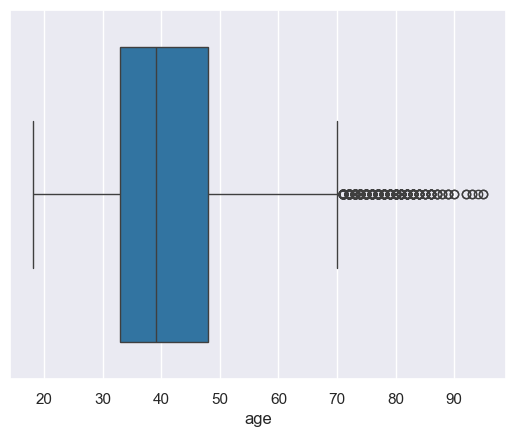

In [104]:
#boxplot
sns.boxplot(x = df.age)

In [105]:
print('Numerber of outliers: ', df[df['age'] > 70.6]['age'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['age'] > 70.6]['age'].count()*100/len(df),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


In [106]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [107]:
median = df['age'].median()

df['age'] = np.where(df['age'] > upper_limit, median, df['age'])

**Insight: Age Distribution & Outlier Handling**     
* The age feature represents the customer's age and is an important demographic variable in predicting term deposit subscription.
* Using the Interquartile Range (IQR) method, we identified that values above **70.5 years** fall outside the upper bound. However,  These outliers constitute approximately **1.08%** of the total data.
* While such values are **realistic and may represent senior customers**, they are extreme compared to the rest of the data and may introduce skewness that affects model performance.
* Therefore, to reduce the influence of extreme values while preserving data integrity, we chose to **replace outliers above 70.5 with the median age value**. This approach helps maintain meaningful variation without allowing outliers to disproportionately influence the model.

## **Balance**

In [110]:
# Finding Outlier in balance
Q1 = df['balance'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['balance'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : 72.0
upper quantile : 1428.0
IQR : 1356.0
lower_limit : -1962.0
upper_limit : 3462.0


In [111]:
# find the values of above upper limit
df.loc[df.balance>upper_limit]

age          job   marital  education default  balance housing loan  \
34     51.0   management   married   tertiary      no    10635     yes   no   
65     51.0   management   married   tertiary      no     6530     yes   no   
69     35.0  blue-collar    single  secondary      no    12223     yes  yes   
70     57.0  blue-collar   married  secondary      no     5935     yes  yes   
186    40.0     services  divorced    unknown      no     4384     yes   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
45164  35.0     services   married   tertiary      no     4655      no   no   
45181  46.0  blue-collar   married  secondary      no     6879      no   no   
45185  60.0     services   married   tertiary      no     4256     yes   no   
45191  39.0      retired  divorced   tertiary      no     3810     yes   no   
45208  39.0      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
34      unknown    5   may       336         1     -1         0  unknown   no  
65      unknown    5   may        91         1     -1         0  unknown   no  
69      unknown    5   may       177         1     -1         0  unknown   no  
70      unknown    5   may       258         1     -1         0  unknown   no  
186     unknown    5   may       315         1     -1         0  unknown   no  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45164  cellular    9   nov       111         2     -1         0  unknown   no  
45181  cellular   15   nov        74         2    118         3  failure   no  
45185  cellular   16   nov       200         1     92         4  success  yes  
45191  cellular   16   nov       262         1    183         1  failure  yes  
45208  cellular   17   nov      1127         5    184         3  success  yes  

[4712 rows x 17 columns]

In [112]:
#find the values below lower limit
df.loc[df.balance<lower_limit]

age            job   marital  education default  balance housing loan  \
1896   57.0  self-employed   married   tertiary     yes    -3313     yes  yes   
7413   43.0     management   married   tertiary     yes    -3372     yes   no   
7756   49.0     management  divorced   tertiary      no    -2049     yes   no   
11655  56.0     management  divorced   tertiary     yes    -1968      no   no   
12909  26.0    blue-collar    single  secondary     yes    -8019      no  yes   
13687  38.0    blue-collar  divorced  secondary      no    -2093     yes  yes   
13708  49.0   entrepreneur   married  secondary      no    -1965      no  yes   
14434  51.0     management  divorced   tertiary      no    -2282     yes  yes   
15682  49.0     management   married   tertiary     yes    -6847      no  yes   
17159  51.0   entrepreneur   married  secondary     yes    -2082      no  yes   
18573  40.0     technician   married   tertiary     yes    -2827     yes  yes   
20317  35.0     management    single   tertiary     yes    -1980     yes  yes   
25119  49.0    blue-collar    single    primary     yes    -2604     yes   no   
25240  43.0       services   married    primary      no    -2122     yes  yes   
31509  52.0     management   married   tertiary      no    -2712     yes  yes   
32713  39.0  self-employed   married   tertiary      no    -3058     yes  yes   
38736  60.0     management  divorced   tertiary      no    -4057     yes   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
1896     unknown    9   may       153         1     -1         0  unknown   no  
7413     unknown   29   may       386         2     -1         0  unknown   no  
7756     unknown   30   may       169         3     -1         0  unknown   no  
11655    unknown   20   jun        60         3     -1         0  unknown   no  
12909   cellular    7   jul       299         3     -1         0  unknown   no  
13687    unknown    9   jul       120         3     -1         0  unknown   no  
13708  telephone   10   jul       317         2     -1         0  unknown   no  
14434   cellular   14   jul       301         6     -1         0  unknown   no  
15682   cellular   21   jul       206         1     -1         0  unknown   no  
17159   cellular   28   jul       123         6     -1         0  unknown   no  
18573   cellular   31   jul       843         1     -1         0  unknown   no  
20317   cellular   11   aug       227         1     -1         0  unknown   no  
25119   cellular   18   nov       142         1     -1         0  unknown   no  
25240   cellular   18   nov       141         3     -1         0  unknown   no  
31509   cellular    2   apr       253         1     -1         0  unknown   no  
32713   cellular   17   apr       882         3     -1         0  unknown  yes  
38736   cellular   18   may       242         6     -1         0  unknown   no

In [113]:
# Checking the percentage of outlier
(len(df.loc[df.balance > upper_limit])/len(df))

0.1042224237464334

<Axes: xlabel='balance'>

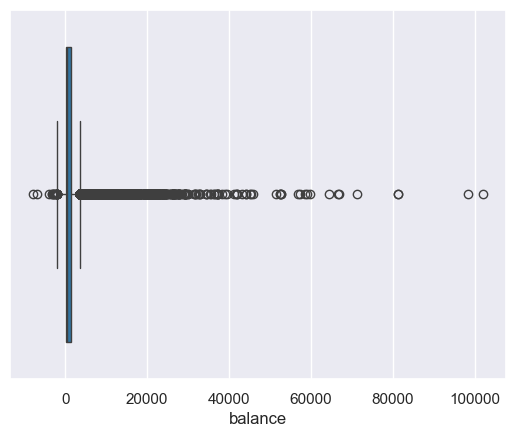

In [114]:
#boxplot
sns.boxplot(x = df.balance)

In [115]:
print('Numerber of outliers: ', df[df['balance'] > 3462.1]['balance'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['balance'] > 3462.1]['balance'].count()*100/len(df),2), '%')

Numerber of outliers:  4712
Number of clients:  45211
Outliers are: 10.42 %


In [116]:
# Shift balance to make all values positive
min_balance = df['balance'].min()
df['balance_log'] = np.log1p(df['balance'] - min_balance + 1) # log1p(x) = log(1 + x) is numerically stable and handles 0

In [117]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'balance_log'],
      dtype='object')

**Insight: Balance Distribution & Outlier Handling**

* The **balance** feature indicates the customer's account balance and is a crucial financial attribute for predicting term deposit subscription.
* Using the Interquartile Range (IQR) method, we identified that values above **₹3462** fall outside the upper bound. Approximately **10.42%** of the lies beyond this limit, revealing a significant number of high-balance accounts.
* The distribution is heavily **right-skew**, with some balances exceeding **₹1,00,000**. These high values likely represent high-net-worth individuals, who are more likely to subscribe to term deposits. To avoid discarding valuable information, we chose to retain these outliers.
* To address the skewness **at the preprocessing stage**, we applied a **log transformation** on the **balance** column. This normalizes the distribution, reduces the impact of extreme values, and improves model robustness without requiring removal or capping of outliers.

## **Day**

In [120]:
# Finding Outlier in day
Q1 = df['day'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['day'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : 8.0
upper quantile : 21.0
IQR : 13.0
lower_limit : -11.5
upper_limit : 40.5


In [121]:
# find the values of above upper limit
df.loc[df.day > upper_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y, balance_log]
Index: []

In [122]:
#find the vales below lower limit
df.loc[df.day < lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y, balance_log]
Index: []

In [123]:
# Checking the percentage of outlier
len(df.loc[df.day > upper_limit]) / len(df)

0.0

<Axes: xlabel='day'>

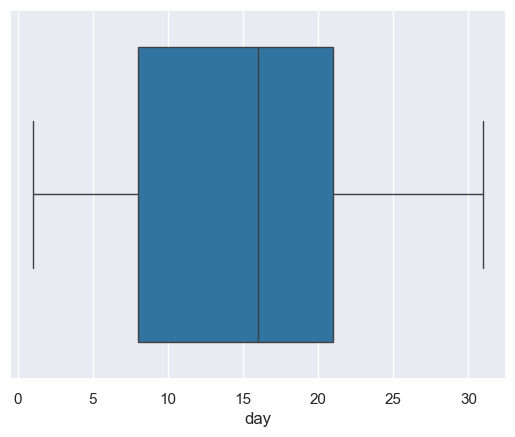

In [124]:
#boxplot
sns.boxplot(x = df.day)

In [125]:
print('Numerber of outliers: ', df[df['day'] > 40.6]['day'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['day'] > 40.6]['day'].count()*100/len(df),2), '%')

Numerber of outliers:  0
Number of clients:  45211
Outliers are: 0.0 %


**Insight: Day Distribution & Outlier Check**    

* The **day** feature represents the calendar day on which the last contact with the client occurred.
* Using the Interquartile Range (IQR) method, we found that the data falls entirely within the valid range of days (1 to 31), with no values exceeding the upper or lower bounds.
* Therefore, the dataset contains **0% outliers** in the **day** column.
* No outlier treatment is required for this feature, and all values are retained as-is.

## **Duration**

In [128]:
# Finding Outlier in duration
Q1 = df['duration'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['duration'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : 103.0
upper quantile : 319.0
IQR : 216.0
lower_limit : -221.0
upper_limit : 643.0


In [129]:
# find the values of above upper limit
df.loc[df.duration > upper_limit]

age          job   marital  education default  balance housing loan  \
37     53.0   technician   married  secondary      no       -3      no   no   
43     54.0      retired   married  secondary      no      529     yes   no   
53     42.0       admin.    single  secondary      no      -76     yes   no   
59     46.0     services   married    primary      no      179     yes   no   
61     53.0   technician  divorced  secondary      no      989     yes   no   
...     ...          ...       ...        ...     ...      ...     ...  ...   
45124  27.0  blue-collar    single    primary      no      232     yes   no   
45199  34.0  blue-collar    single  secondary      no     1475     yes   no   
45200  38.0   technician   married  secondary      no      557     yes   no   
45206  51.0   technician   married   tertiary      no      825      no   no   
45208  39.0      retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  \
37      unknown    5   may      1666         1     -1         0  unknown   no   
43      unknown    5   may      1492         1     -1         0  unknown   no   
53      unknown    5   may       787         1     -1         0  unknown   no   
59      unknown    5   may      1778         1     -1         0  unknown   no   
61      unknown    5   may       812         1     -1         0  unknown   no   
...         ...  ...   ...       ...       ...    ...       ...      ...  ...   
45124  cellular   26   oct       701         2     -1         0  unknown  yes   
45199  cellular   16   nov      1166         3    530        12    other   no   
45200  cellular   16   nov      1556         4     -1         0  unknown  yes   
45206  cellular   17   nov       977         3     -1         0  unknown  yes   
45208  cellular   17   nov      1127         5    184         3  success  yes   

       balance_log  
37        8.989444  
43        9.053687  
53        8.980298  
59        9.011889  
61        9.106090  
...            ...  
45124     9.018332  
45199     9.158626  
45200     9.056956  
45206     9.087721  
45208     9.527775  

[3235 rows x 18 columns]

In [130]:
#find the vales below lower limit
df.loc[df.duration < lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y, balance_log]
Index: []

In [131]:
# Checking the percentage of outlier
len(df.loc[df.duration > upper_limit]) / len(df)

0.07155338302625468

<Axes: xlabel='duration'>

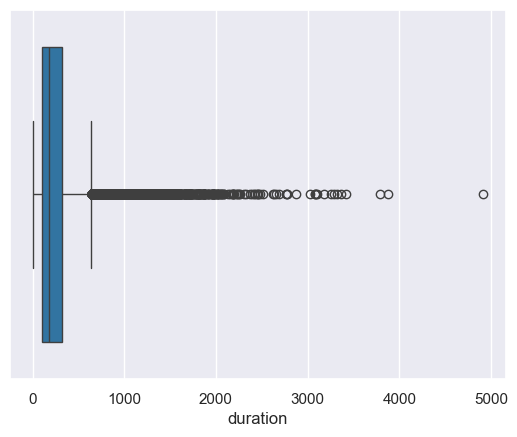

In [132]:
#boxplot
sns.boxplot(x = df.duration)

In [133]:
print('Numerber of outliers: ', df[df['duration'] > 644.0]['duration'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['duration'] > 644.0]['duration'].count()*100/len(df),2), '%')

Numerber of outliers:  3222
Number of clients:  45211
Outliers are: 7.13 %


In [134]:
# Convert duration from seconds to minutes
df['duration'] = df['duration'] / 60

In [135]:
df['duration_log'] = np.log(df['duration'] + 1)

**Insight: Call Duration Distribution & Outlier Handling**    

* The **duration** feature represents the last contact duration in seconds, and it's a highly predictive variable for term deposit subscription.
* Using the IQR method, we found that values above **643 seconds** are considered statistical outliers, accounting for approximately **7.15%** of the records.
* However, these longer durations likely indicate **more meaningful client interactions**, which are critical for predicting subscription likelihood. Therefore, instead of removing or capping these outliers, we retained them to preserve valuable information.
* To handle the skewness and scale of this feature, we applied a **log transformation (log1p)**, which compresses the range of duration values and stabilizes variance, improving model performance without losing critical insights.

## **Campaign**

In [138]:
# Finding Outlier in campaign
Q1 = df['campaign'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['campaign'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : 1.0
upper quantile : 3.0
IQR : 2.0
lower_limit : -2.0
upper_limit : 6.0


In [139]:
# find the values of above upper limit
df.loc[df.campaign > upper_limit]

age            job  marital  education default  balance housing loan  \
758    59.0       services  married  secondary      no      307     yes  yes   
780    30.0         admin.  married  secondary      no        4      no   no   
906    27.0       services   single  secondary      no        0     yes   no   
1103   52.0     technician  married    unknown      no      133     yes   no   
1105   43.0         admin.  married   tertiary      no     1924     yes   no   
...     ...            ...      ...        ...     ...      ...     ...  ...   
44666  25.0     technician   single  secondary      no     1298      no   no   
44680  27.0  self-employed   single   tertiary      no      560      no   no   
44770  37.0       services   single   tertiary      no     1189      no   no   
44886  38.0     management  married   tertiary      no        0      no   no   
45056  64.0     management  married   tertiary      no     5112      no   no   

         contact  day month   duration  campaign  pdays  previous poutcome  \
758      unknown    6   may   4.166667         7     -1         0  unknown   
780      unknown    7   may   2.866667         8     -1         0  unknown   
906      unknown    7   may   6.466667         7     -1         0  unknown   
1103     unknown    7   may   4.216667         8     -1         0  unknown   
1105     unknown    7   may   4.066667         7     -1         0  unknown   
...          ...  ...   ...        ...       ...    ...       ...      ...   
44666   cellular    2   sep   3.433333         7     94         2    other   
44680  telephone    3   sep   9.050000         9    465         2  failure   
44770   cellular   13   sep   5.383333         9    199         4    other   
44886   cellular   24   sep   4.100000        12    197         6  failure   
45056  telephone   19   oct  14.966667         7    137        11    other   

         y  balance_log  duration_log  
758     no     9.027379      1.642228  
780     no     8.990317      1.352393  
906     no     8.989818      2.010449  
1103    no     9.006264      1.651859  
1105    no     9.204825      1.622683  
...    ...          ...           ...  
44666   no     9.139811      1.489152  
44680   no     9.057306      2.307573  
44770  yes     9.128045      1.853690  
44886   no     8.989818      1.629241  
45056  yes     9.482883      2.770503  

[3064 rows x 19 columns]

In [140]:
#find the vales below lower limit
df.loc[df.campaign < lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y, balance_log, duration_log]
Index: []

In [141]:
# Checking the percentage of outlier
(len(df.loc[df.campaign > upper_limit]) / len(df))

0.06777111764835991

<Axes: xlabel='campaign'>

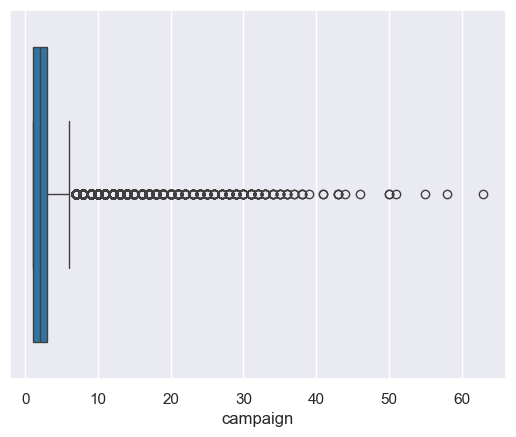

In [142]:
#boxplot
sns.boxplot(x = df.campaign)

In [143]:
print('Numerber of outliers: ', df[df['campaign'] > 6.1]['campaign'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['campaign'] > 6.1]['campaign'].count()*100/len(df),2), '%')

Numerber of outliers:  3064
Number of clients:  45211
Outliers are: 6.78 %


**Insight: Campaign Contact Frequency & Outlier Treatment**     

* The **campaign** feature indicates the number of contacts made during the current marketing campaign.
* Using the IQR method, values above **6** are considered outliers.
* Approximately **6.78%** of records exceed this threshold.
* Excessive contact attempts can reflect diminishing returns or even lead to customer dissatisfaction.
* Therefore, we recommend **capping** the outliers (e.g., replacing values > 6 with 6) or optionally **removing** them to maintain data quality and reduce model noise.

In [145]:
df['campaign'] = np.where(df['campaign'] > upper_limit, upper_limit, df['campaign'])

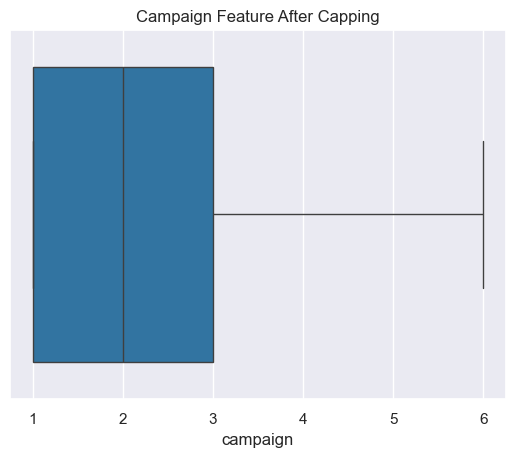

In [146]:
sns.boxplot(x=df['campaign'])
plt.title("Campaign Feature After Capping")
plt.show()

**Insight: Campaign Contact Frequency & Outlier Treatment (After Capping)**      

* The campaign feature originally had approximately **6.78% outliers** (i.e., customers contacted more than 6 times).
* These extreme values were **capped at 6** to reduce the influence of rare, excessive contact attempts, which could negatively affect model performance.
* This preserved the overall data integrity while minimizing noise from rare campaign efforts.

## **Pdays**

In [149]:
# Finding Outlier in pdays
Q1 = df['pdays'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['pdays'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : -1.0
upper quantile : -1.0
IQR : 0.0
lower_limit : -1.0
upper_limit : -1.0


In [150]:
# find the values of above upper limit
df.loc[df.pdays > upper_limit]

age           job  marital  education default  balance housing loan  \
24060  33.0        admin.  married   tertiary      no      882      no   no   
24062  42.0        admin.   single  secondary      no     -247     yes  yes   
24064  33.0      services  married  secondary      no     3444     yes   no   
24072  36.0    management  married   tertiary      no     2415     yes   no   
24077  36.0    management  married   tertiary      no        0     yes   no   
...     ...           ...      ...        ...     ...      ...     ...  ...   
45199  34.0   blue-collar   single  secondary      no     1475     yes   no   
45201  53.0    management  married   tertiary      no      583      no   no   
45204  39.0       retired  married  secondary      no     2850      no   no   
45208  39.0       retired  married  secondary      no     5715      no   no   
45210  37.0  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month   duration  campaign  pdays  previous poutcome  \
24060  telephone   21   oct   0.650000       1.0    151         3  failure   
24062  telephone   21   oct   8.650000       1.0    166         1    other   
24064  telephone   21   oct   2.400000       1.0     91         4  failure   
24072  telephone   22   oct   1.216667       1.0     86         4    other   
24077  telephone   23   oct   2.333333       1.0    143         3  failure   
...          ...  ...   ...        ...       ...    ...       ...      ...   
45199   cellular   16   nov  19.433333       3.0    530        12    other   
45201   cellular   17   nov   3.766667       1.0    184         4  success   
45204   cellular   17   nov   5.000000       1.0     40         8  failure   
45208   cellular   17   nov  18.783333       5.0    184         3  success   
45210   cellular   17   nov   6.016667       2.0    188        11    other   

         y  balance_log  duration_log  
24060   no     9.094144      0.500775  
24062  yes     8.958540      2.266958  
24064  yes     9.347054      1.223775  
24072   no     9.253017      0.796005  
24077  yes     8.989818      1.203973  
...    ...          ...           ...  
45199   no     9.158626      3.017168  
45201  yes     9.059982      1.561647  
45204  yes     9.293854      1.791759  
45208  yes     9.527775      2.984840  
45210   no     9.304923      1.948288  

[8257 rows x 19 columns]

In [151]:
#find the vales below lower limit
df.loc[df.pdays < lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y, balance_log, duration_log]
Index: []

In [152]:
# Checking the percentage of outlier
len(df.loc[df.pdays > upper_limit]) / len(df)

0.18263254517705868

<Axes: xlabel='pdays'>

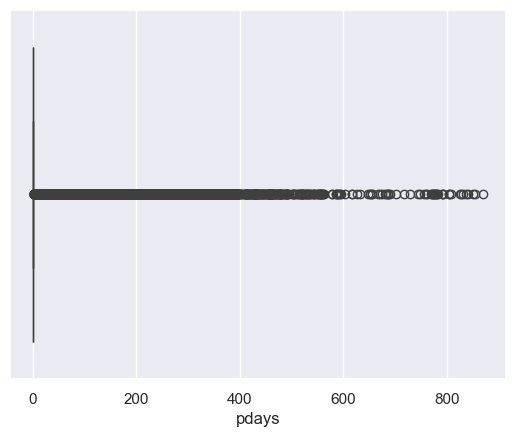

In [153]:
#boxplot
sns.boxplot(x = df.pdays)

In [154]:
print('Numerber of outliers: ', df[df['pdays'] > -0.9]['pdays'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['pdays'] > -0.9]['pdays'].count()*100/len(df),2), '%')

Numerber of outliers:  8257
Number of clients:  45211
Outliers are: 18.26 %


In [155]:
# Create binary feature: Was the client contacted before?
df['contacted_before'] = np.where(df['pdays'] == -1, 0, 1)

In [156]:
df.drop('pdays', axis=1, inplace=True)

**Insight: pdays – Previous Contact Timing & Feature Engineering**    

* The pdays feature captures the number of days since a client was last contacted during a previous marketing campaign.
* A value of -1 indicates the client **was not contacted before.**
* Using the IQR method:
  - **Q1 = Q3 = -1 → IQR = 0**
  - This causes any value > –1 to be flagged as an outlier.
* However, these **18.26%** records represent clients who were previously contacted — a valuable behavioral signal, not noise.
* Instead of removing or capping these values, we performed feature engineering by **creating a binary feature**:
  - contacted_before = 0 → Not contacted before  
  - contacted_before = 1 → Contacted before
* This transformation:
  - Preserves important historical campaign insight
  - Improves model interpretability
  - Avoids distorting the dataset by removing informative data

## **Previous**

In [159]:
# Finding Outlier in previous
Q1 = df['previous'].quantile(0.25)
print('lower quantile :',Q1)

Q3 = df['previous'].quantile(0.75)
print('upper quantile :',Q3)

# finding IQR
IQR = Q3 - Q1
print('IQR :',IQR)

#finding lower and upper limit
lower_limit = Q1 - 1.5 * IQR
print('lower_limit :',lower_limit)
upper_limit = Q3 + 1.5 * IQR
print('upper_limit :',upper_limit)

lower quantile : 0.0
upper quantile : 0.0
IQR : 0.0
lower_limit : 0.0
upper_limit : 0.0


In [160]:
# find the values of above upper limit
df.loc[df.previous > upper_limit]

age           job  marital  education default  balance housing loan  \
24060  33.0        admin.  married   tertiary      no      882      no   no   
24062  42.0        admin.   single  secondary      no     -247     yes  yes   
24064  33.0      services  married  secondary      no     3444     yes   no   
24072  36.0    management  married   tertiary      no     2415     yes   no   
24077  36.0    management  married   tertiary      no        0     yes   no   
...     ...           ...      ...        ...     ...      ...     ...  ...   
45199  34.0   blue-collar   single  secondary      no     1475     yes   no   
45201  53.0    management  married   tertiary      no      583      no   no   
45204  39.0       retired  married  secondary      no     2850      no   no   
45208  39.0       retired  married  secondary      no     5715      no   no   
45210  37.0  entrepreneur  married  secondary      no     2971      no   no   

         contact  day month   duration  campaign  previous poutcome    y  \
24060  telephone   21   oct   0.650000       1.0         3  failure   no   
24062  telephone   21   oct   8.650000       1.0         1    other  yes   
24064  telephone   21   oct   2.400000       1.0         4  failure  yes   
24072  telephone   22   oct   1.216667       1.0         4    other   no   
24077  telephone   23   oct   2.333333       1.0         3  failure  yes   
...          ...  ...   ...        ...       ...       ...      ...  ...   
45199   cellular   16   nov  19.433333       3.0        12    other   no   
45201   cellular   17   nov   3.766667       1.0         4  success  yes   
45204   cellular   17   nov   5.000000       1.0         8  failure  yes   
45208   cellular   17   nov  18.783333       5.0         3  success  yes   
45210   cellular   17   nov   6.016667       2.0        11    other   no   

       balance_log  duration_log  contacted_before  
24060     9.094144      0.500775                 1  
24062     8.958540      2.266958                 1  
24064     9.347054      1.223775                 1  
24072     9.253017      0.796005                 1  
24077     8.989818      1.203973                 1  
...            ...           ...               ...  
45199     9.158626      3.017168                 1  
45201     9.059982      1.561647                 1  
45204     9.293854      1.791759                 1  
45208     9.527775      2.984840                 1  
45210     9.304923      1.948288                 1  

[8257 rows x 19 columns]

In [161]:
#find the vales below lower limit
df.loc[df.previous < lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, previous, poutcome, y, balance_log, duration_log, contacted_before]
Index: []

In [162]:
# Checking the percentage of outlier
(len(df.loc[df.previous > upper_limit])/len(df))

0.18263254517705868

<Axes: xlabel='previous'>

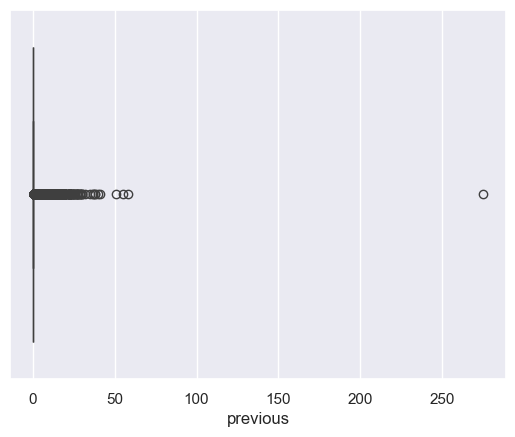

In [163]:
#boxplot
sns.boxplot(x = df.previous)

In [164]:
print('Numerber of outliers: ', df[df['previous'] > 0.1]['previous'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['previous'] > 0.1]['previous'].count()*100/len(df),2), '%')

Numerber of outliers:  8257
Number of clients:  45211
Outliers are: 18.26 %


In [165]:
# Create a binary feature: was previously contacted or not
df['previously_contacted'] = np.where(df['previous'] == 0, 1, 0)

In [166]:
df.drop('previous', axis=1, inplace=True)

**Insight: previous – Number of Past Contacts & Skewed Distribution**      

* The previous feature captures how many times the client was contacted before the current campaign.
* IQR method identifies values > **0** as outliers due to:
  - **Q1 = Q3 = 0 → IQR = 0**
* Around **18.26%** of records have values > 0, indicating **prior contact** history.
* These are not erroneous values but indicate varying engagement levels.
* Since this feature is **heavily skewed**, we recommend:
  - Creating a binary feature (previously_contacted) to capture whether a client was contacted before.
  - Optionally drop the original column if it doesn't add value over the binary feature.
* Decision can be based on **model performance comparison** with and without the **previous** column.

# **6️⃣Encoding Categorical Variables**

In [169]:
# Binary label encode
binary_cols = ['default', 'housing', 'loan']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [170]:
# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [171]:
# Ordinal encoding
ordinal_month = { 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                  'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                  'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
                 }
df['month'] = df['month'].map(ordinal_month)

In [172]:
# One-hot encode nominal categorical features
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)

In [173]:
print(df.isnull().sum())

age                     0
default                 0
balance                 0
housing                 0
loan                    0
day                     0
month                   0
duration                0
campaign                0
y                       0
balance_log             0
duration_log            0
contacted_before        0
previously_contacted    0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_unknown             0
marital_married         0
marital_single          0
education_secondary     0
education_tertiary      0
education_unknown       0
contact_telephone       0
contact_unknown         0
poutcome_other          0
poutcome_success        0
poutcome_unknown        0
dtype: int64


# **7️⃣ Split the data Into Train and Test**

In [175]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('y', axis=1)
y = df['y']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [176]:
df['y'].value_counts(normalize=True) * 100

y
0    88.30152
1    11.69848
Name: proportion, dtype: float64

In [177]:
# Apply SMOTE only to training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [178]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [179]:
print(df[binary_cols].isnull().sum())

default    0
housing    0
loan       0
dtype: int64


In [180]:
print(df['month'].unique())

[ 5  6  7  8 10 11 12  1  2  3  4  9]


In [181]:
print(df.columns)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'y', 'balance_log', 'duration_log',
       'contacted_before', 'previously_contacted', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [182]:
print(df['duration_log'].describe())

count    45211.000000
mean         1.445795
std          0.638807
min          0.000000
25%          0.999406
50%          1.386294
75%          1.843192
max          4.418439
Name: duration_log, dtype: float64


In [183]:
print(df['balance_log'].describe())

count    45211.000000
mean         9.118780
std          0.212325
min          0.693147
25%          8.998755
50%          9.044168
75%          9.153664
max         11.609580
Name: balance_log, dtype: float64


In [184]:
print(y_train_sm.value_counts())

y
0    31937
1    31937
Name: count, dtype: int64


# **Logistic Regression**

In [186]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [187]:
# Evaluate the model
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

In [188]:
train_acc_lr = accuracy_score(y_train_sm, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

In [189]:
y_train_proba_lr = lr.predict_proba(X_train_scaled)[:, 1]
y_test_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

In [190]:
# Compute AUC Scores
train_auc_lr = roc_auc_score(y_train_sm, y_train_proba_lr)
test_auc_lr = roc_auc_score(y_test, y_test_proba_lr)

----- Logistic Regression -----
 Train Accuracy: 0.9165
 Test Accuracy : 0.8813
*************************************
 Train AUC: 0.9727
 Test AUC: 0.8581
*************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.49      0.50      0.50      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.72      0.72      9043
weighted avg       0.88      0.88      0.88      9043



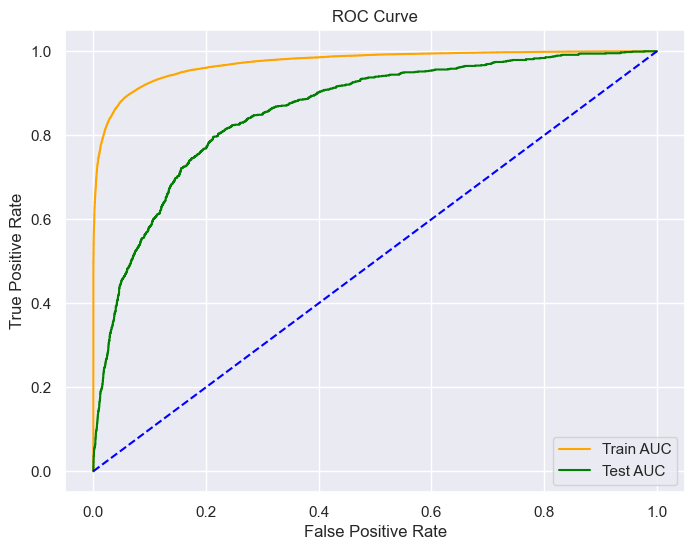

In [191]:
# Evaluation
print("----- Logistic Regression -----")
print(f" Train Accuracy: {train_acc_lr:.4f}")
print(f" Test Accuracy : {test_acc_lr:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_lr:.4f}")
print(f" Test AUC: {test_auc_lr:.4f}")
print('*************************************')

print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

# ROC Curves
fpr_train_lr, tpr_train_lr, _ = roc_curve(y_train_sm, y_train_proba_lr)
fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, y_test_proba_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_lr, tpr_train_lr, label='Train AUC', color='orange')
plt.plot(fpr_test_lr, tpr_test_lr, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

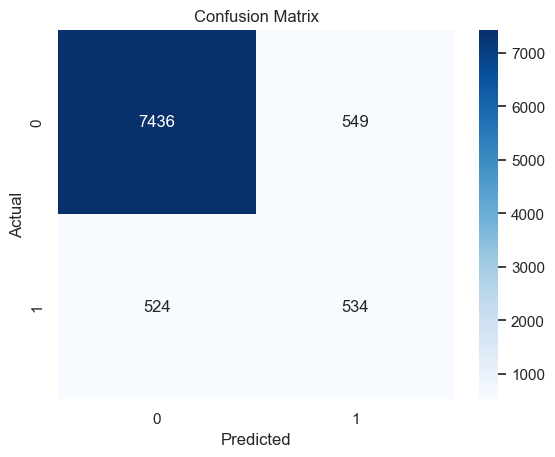

In [192]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **K-Nearest Neighbors (KNN)**

In [194]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, y_train_sm)

KNeighborsClassifier()

In [195]:
# Predict
y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

In [196]:
train_acc_knn = accuracy_score(y_train_sm, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

In [197]:
y_train_proba_knn = knn.predict_proba(X_train_scaled)[:, 1]
y_test_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

In [198]:
# Compute AUC Scores
train_auc_knn = roc_auc_score(y_train_sm, y_train_proba_knn)
test_auc_knn = roc_auc_score(y_test, y_test_proba_knn)

----- K-Nearest Neighbors (KNN) -----
 Train Accuracy: 0.9501
 Test Accuracy : 0.8770
*************************************
 Train AUC: 0.9922
 Test AUC: 0.8003
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7985
           1       0.47      0.41      0.44      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.67      0.68      9043
weighted avg       0.87      0.88      0.87      9043



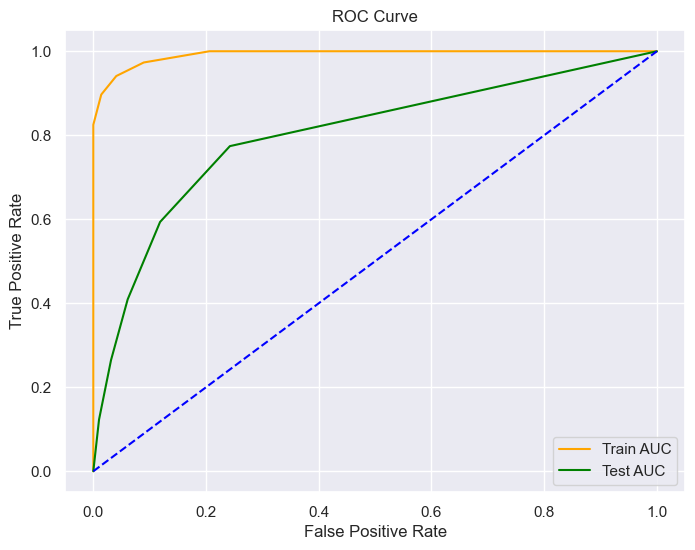

In [199]:
# Evaluation
print("----- K-Nearest Neighbors (KNN) -----")
print(f" Train Accuracy: {train_acc_knn:.4f}")
print(f" Test Accuracy : {test_acc_knn:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_knn:.4f}")
print(f" Test AUC: {test_auc_knn:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_knn))

# ROC Curves
fpr_train_knn, tpr_train_knn, _ = roc_curve(y_train_sm, y_train_proba_knn)
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, y_test_proba_knn)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_knn, tpr_train_knn, label='Train AUC', color='orange')
plt.plot(fpr_test_knn, tpr_test_knn, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

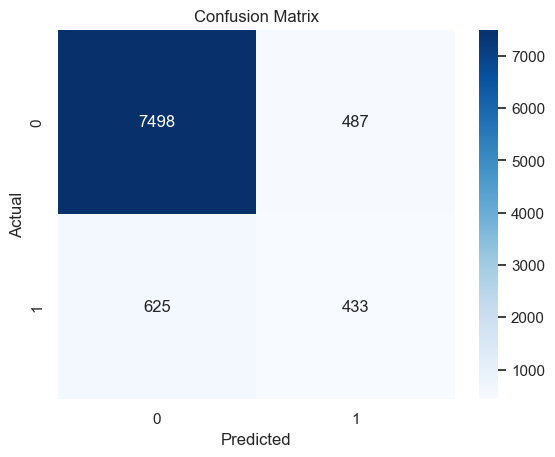

In [200]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Decision Tree**

In [202]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [203]:
# Predict
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [204]:
train_acc_dt = accuracy_score(y_train_sm, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

In [205]:
y_train_proba_dt = dt.predict_proba(X_train_scaled)[:, 1]
y_test_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

In [206]:
# Compute AUC Scores
train_auc_dt = roc_auc_score(y_train_sm, y_train_proba_dt)
test_auc_dt = roc_auc_score(y_test, y_test_proba_dt)

----- Decision Tree -----
 Train Accuracy: 1.0000
 Test Accuracy : 0.8680
*************************************
 Train AUC: 1.0000
 Test AUC: 0.7243
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      7985
           1       0.45      0.54      0.49      1058

    accuracy                           0.87      9043
   macro avg       0.69      0.72      0.71      9043
weighted avg       0.88      0.87      0.87      9043



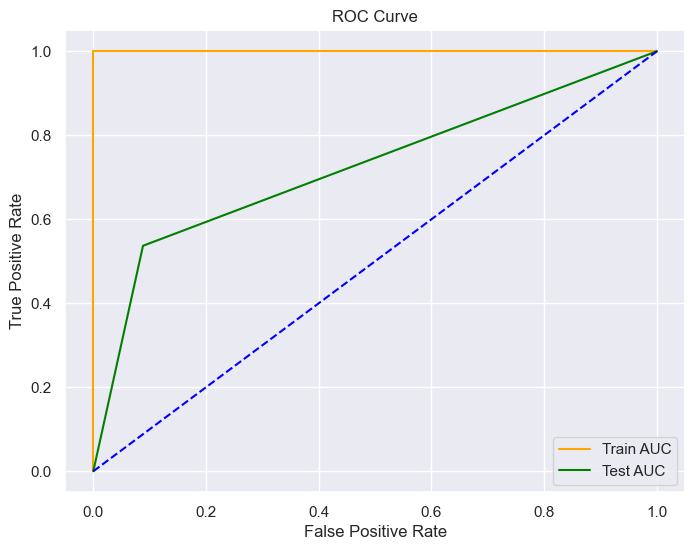

In [207]:
# Evaluation
print("----- Decision Tree -----")
print(f" Train Accuracy: {train_acc_dt:.4f}")
print(f" Test Accuracy : {test_acc_dt:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_dt:.4f}")
print(f" Test AUC: {test_auc_dt:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_dt))

# ROC Curves
fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train_sm, y_train_proba_dt)
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_test_proba_dt)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_dt, tpr_train_dt, label='Train AUC', color='orange')
plt.plot(fpr_test_dt, tpr_test_dt, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

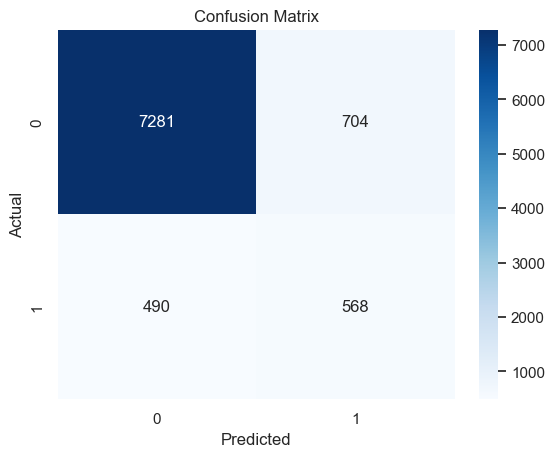

In [208]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Random Forest**

In [210]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [211]:
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

In [212]:
train_acc_rf = accuracy_score(y_train_sm, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

In [213]:
y_train_proba_rf = rf.predict_proba(X_train_scaled)[:, 1]
y_test_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [214]:
# Compute AUC Scores
train_auc_rf = roc_auc_score(y_train_sm, y_train_proba_rf)
test_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

----- Random Forest -----
 Train Accuracy: 1.0000
 Test Accuracy : 0.8959
*************************************
 Train AUC: 1.0000
 Test AUC: 0.9160
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7985
           1       0.56      0.53      0.54      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.74      0.74      9043
weighted avg       0.89      0.90      0.89      9043



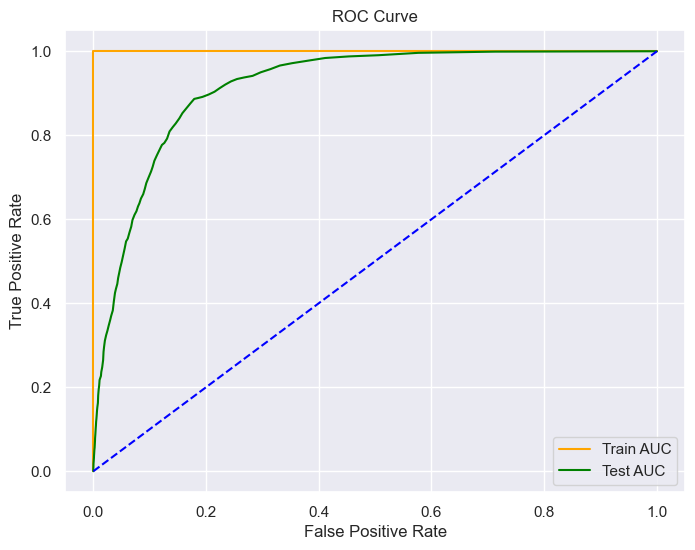

In [215]:
# Evaluation
print("----- Random Forest -----")
print(f" Train Accuracy: {train_acc_rf:.4f}")
print(f" Test Accuracy : {test_acc_rf:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_rf:.4f}")
print(f" Test AUC: {test_auc_rf:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_rf))

# ROC Curves
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_sm, y_train_proba_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_proba_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label='Train AUC', color='orange')
plt.plot(fpr_test_rf, tpr_test_rf, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

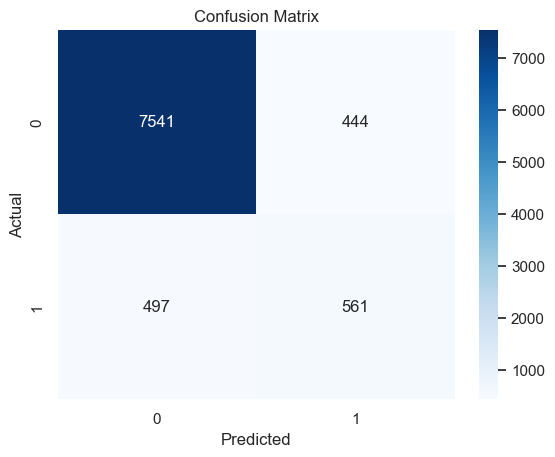

In [216]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Support Vector Machine (SVM)**

In [218]:
# Train SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)  
svm.fit(X_train_scaled, y_train_sm)

SVC(probability=True, random_state=42)

In [219]:
# Predict
y_train_pred_svm = svm.predict(X_train_scaled)
y_test_pred_svm = svm.predict(X_test_scaled)

In [220]:
train_acc_svm = accuracy_score(y_train_sm, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

In [221]:
y_train_proba_svm = svm.predict_proba(X_train_scaled)[:, 1]
y_test_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

In [222]:
# Compute AUC Scores
train_auc_svm = roc_auc_score(y_train_sm, y_train_proba_svm)
test_auc_svm = roc_auc_score(y_test, y_test_proba_svm)

----- Support Vector Machine (SVM) -----
 Train Accuracy: 0.9358
 Test Accuracy : 0.8941
*************************************
 Train AUC: 0.9835
 Test AUC: 0.8711
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.56      0.45      0.50      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.72      9043
weighted avg       0.89      0.89      0.89      9043



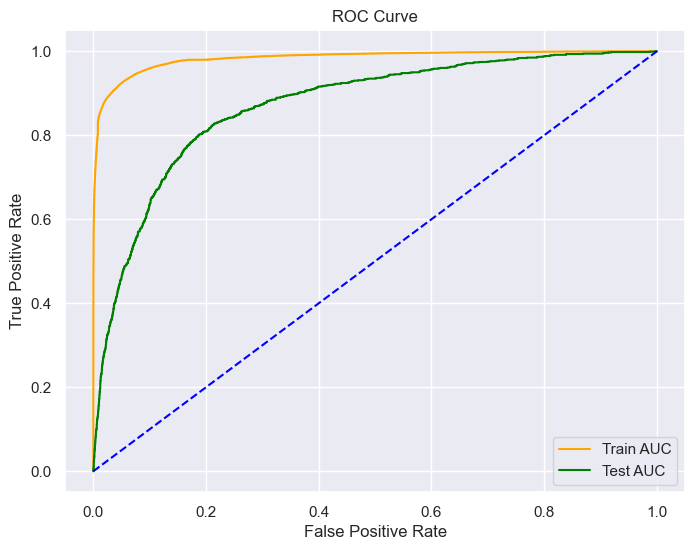

In [223]:
# Evaluation
print("----- Support Vector Machine (SVM) -----")
print(f" Train Accuracy: {train_acc_svm:.4f}")
print(f" Test Accuracy : {test_acc_svm:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_svm:.4f}")
print(f" Test AUC: {test_auc_svm:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_svm))

# ROC Curves
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train_sm, y_train_proba_svm)
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_test_proba_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_svm, tpr_train_svm, label='Train AUC', color='orange')
plt.plot(fpr_test_svm, tpr_test_svm, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

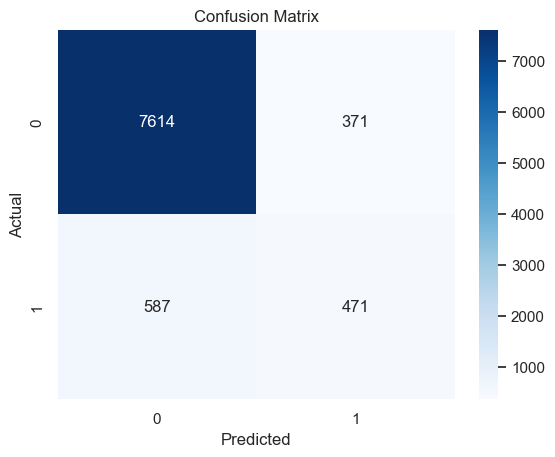

In [224]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Naive Bayes**

In [226]:
# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_sm)

GaussianNB()

In [227]:
# Predict
y_train_pred_nb = nb.predict(X_train_scaled)
y_test_pred_nb = nb.predict(X_test_scaled)

In [228]:
train_acc_nb = accuracy_score(y_train_sm, y_train_pred_nb)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)

In [229]:
y_train_proba_nb = nb.predict_proba(X_train_scaled)[:, 1]
y_test_proba_nb = nb.predict_proba(X_test_scaled)[:, 1]

In [230]:
# Compute AUC Scores
train_auc_nb = roc_auc_score(y_train_sm, y_train_proba_nb)
test_auc_nb = roc_auc_score(y_test, y_test_proba_nb)

----- Naive Bayes -----
 Train Accuracy: 0.8264
 Test Accuracy : 0.8106
*************************************
 Train AUC: 0.9030
 Test AUC: 0.7995
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      7985
           1       0.33      0.58      0.42      1058

    accuracy                           0.81      9043
   macro avg       0.63      0.71      0.65      9043
weighted avg       0.87      0.81      0.83      9043



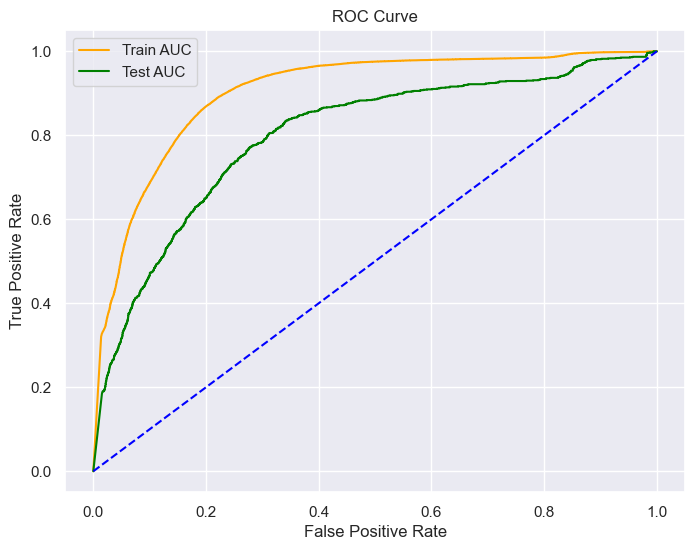

In [231]:
# Evaluation
print("----- Naive Bayes -----")
print(f" Train Accuracy: {train_acc_nb:.4f}")
print(f" Test Accuracy : {test_acc_nb:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_nb:.4f}")
print(f" Test AUC: {test_auc_nb:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_nb))

# ROC Curves
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train_sm, y_train_proba_nb)
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_test_proba_nb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_nb, tpr_train_nb, label='Train AUC', color='orange')
plt.plot(fpr_test_nb, tpr_test_nb, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

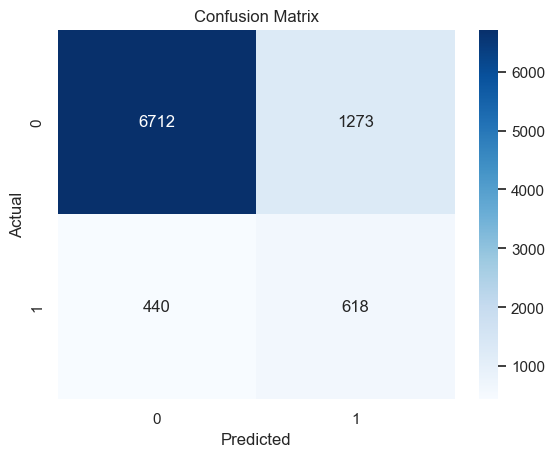

In [232]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_test_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **XGBoost Classifier**

In [234]:
# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [235]:
# Predictions
y_train_pred_xgb = xgb.predict(X_train_scaled)
y_test_pred_xgb = xgb.predict(X_test_scaled)

In [236]:
train_acc_xgb = accuracy_score(y_train_sm, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

In [237]:
y_train_proba_xgb = xgb.predict_proba(X_train_scaled)[:, 1]
y_test_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [238]:
# Compute AUC Scores
train_auc_xgb = roc_auc_score(y_train_sm, y_train_proba_xgb)
test_auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)

----- XGBoost Classifier -----
 Train Accuracy: 0.9677
 Test Accuracy : 0.9030
*************************************
 Train AUC: 0.9962
 Test AUC: 0.9258
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.60      0.51      0.55      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.73      0.75      9043
weighted avg       0.90      0.90      0.90      9043



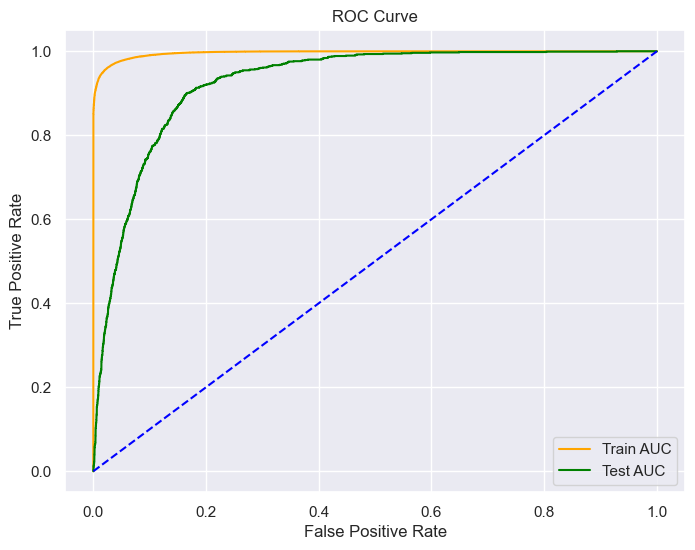

In [239]:
# Evaluation
print("----- XGBoost Classifier -----")
print(f" Train Accuracy: {train_acc_xgb:.4f}")
print(f" Test Accuracy : {test_acc_xgb:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_xgb:.4f}")
print(f" Test AUC: {test_auc_xgb:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

# ROC Curves
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train_sm, y_train_proba_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_proba_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, label='Train AUC', color='orange')
plt.plot(fpr_test_xgb, tpr_test_xgb, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

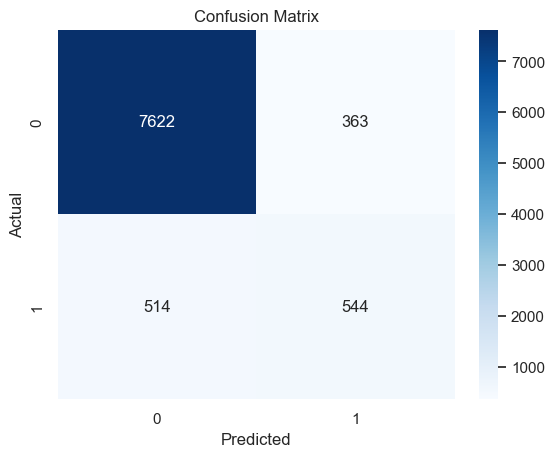

In [240]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Gradient Boosting Classifier**

In [242]:
# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train_sm)

GradientBoostingClassifier(random_state=42)

In [243]:
# Predict
y_train_pred_gb = gb.predict(X_train_scaled)
y_test_pred_gb = gb.predict(X_test_scaled)

In [244]:
train_acc_gb = accuracy_score(y_train_sm, y_train_pred_gb)
test_acc_gb = accuracy_score(y_test, y_test_pred_gb)

In [245]:
y_train_proba_gb = gb.predict_proba(X_train_scaled)[:, 1]
y_test_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

In [246]:
# Compute AUC Scores
train_auc_gb = roc_auc_score(y_train_sm, y_train_proba_gb)
test_auc_gb = roc_auc_score(y_test, y_test_proba_gb)

----- Gradient Boosting Classifier -----
 Train Accuracy: 0.9305
 Test Accuracy : 0.8949
*************************************
 Train AUC: 0.9842
 Test AUC: 0.9094
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7985
           1       0.55      0.60      0.57      1058

    accuracy                           0.89      9043
   macro avg       0.75      0.77      0.76      9043
weighted avg       0.90      0.89      0.90      9043



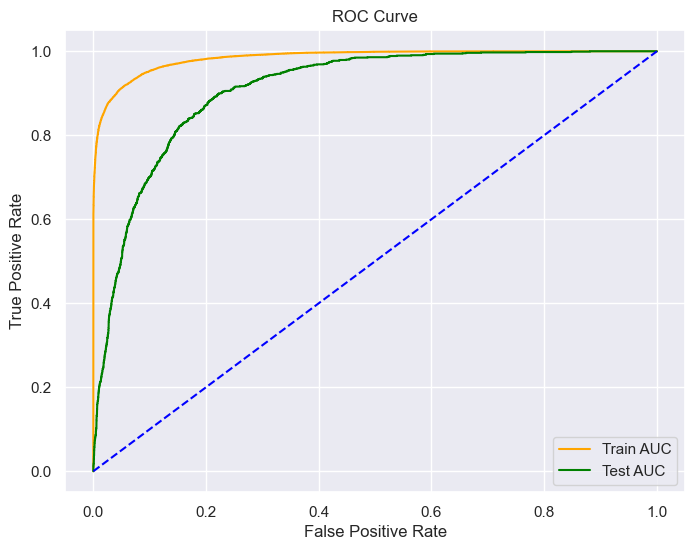

In [247]:
# Evaluation
print("----- Gradient Boosting Classifier -----")
print(f" Train Accuracy: {train_acc_gb:.4f}")
print(f" Test Accuracy : {test_acc_gb:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_gb:.4f}")
print(f" Test AUC: {test_auc_gb:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_gb))

# ROC Curves
fpr_train_gb, tpr_train_gb, _ = roc_curve(y_train_sm, y_train_proba_gb)
fpr_test_gb, tpr_test_gb, _ = roc_curve(y_test, y_test_proba_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_gb, tpr_train_gb, label='Train AUC', color='orange')
plt.plot(fpr_test_gb, tpr_test_gb, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

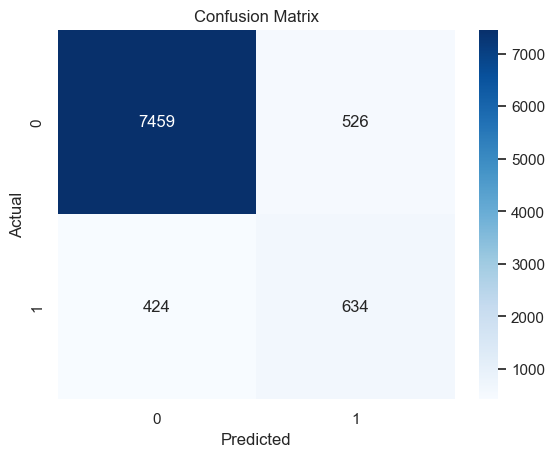

In [248]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [249]:
# Model comparison data
data = [
    ['Logistic Regression', 0.9165, 0.8813, 0.9727, 0.8581, 0.49, 0.50, 0.50],
    ['K-Nearest Neighbors (KNN)', 0.9501, 0.8770, 0.9922, 0.8003, 0.47, 0.41, 0.44],
    ['Decision Tree', 1.0000, 0.8680, 1.0000, 0.7243, 0.45, 0.54, 0.49],
    ['Random Forest', 1.0000, 0.8959, 1.0000, 0.9160, 0.56, 0.53, 0.54],
    ['Support Vector Machine (SVM)', 0.9358, 0.8941, 0.9835, 0.8711, 0.56, 0.45, 0.50],
    ['Naive Bayes', 0.8264, 0.8106, 0.9030, 0.7995, 0.33, 0.58, 0.42],
    ['XGBoost Classifier', 0.9677, 0.9030, 0.9962, 0.9258, 0.60, 0.51, 0.55],
    ['Gradient Boosting Classifier', 0.9305, 0.8949, 0.9842, 0.9094, 0.55, 0.60, 0.57]
]

headers = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train AUC', 'Test AUC', 'Precision', 'Recall', 'F1-Score']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as the index
df_models.set_index('Model', inplace=True)

# Format to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

Train Accuracy  Test Accuracy  Train AUC  \
Model                                                                    
Logistic Regression                   0.9165         0.8813     0.9727   
K-Nearest Neighbors (KNN)             0.9501         0.8770     0.9922   
Decision Tree                         1.0000         0.8680     1.0000   
Random Forest                         1.0000         0.8959     1.0000   
Support Vector Machine (SVM)          0.9358         0.8941     0.9835   
Naive Bayes                           0.8264         0.8106     0.9030   
XGBoost Classifier                    0.9677         0.9030     0.9962   
Gradient Boosting Classifier          0.9305         0.8949     0.9842   

                              Test AUC  Precision  Recall  F1-Score  
Model                                                                
Logistic Regression             0.8581       0.49    0.50      0.50  
K-Nearest Neighbors (KNN)       0.8003       0.47    0.41      0.44  
Decision Tree                   0.7243       0.45    0.54      0.49  
Random Forest                   0.9160       0.56    0.53      0.54  
Support Vector Machine (SVM)    0.8711       0.56    0.45      0.50  
Naive Bayes                     0.7995       0.33    0.58      0.42  
XGBoost Classifier              0.9258       0.60    0.51      0.55  
Gradient Boosting Classifier    0.9094       0.55    0.60      0.57

# **Models to Prioritize for Hyperparameter Tuning**

**1. XGBoost Classifier**  
**Why:** Already shows high performance (Test Accuracy: 90.3%, F1-Score: 0.55) and has many hyperparameters that influence learning rate, tree depth, regularization, etc.  

**2. Gradient Boosting Classifier**  
**Why:** It has the best F1-Score (0.57), meaning it's performing well in both precision and recall. Tuning may push it even higher.  

**3. Random Forest**  
**Why:** High Train Accuracy and AUC (100%), but Test Accuracy is slightly lower (89.59%). This suggests overfitting, which tuning can help reduce.

# **Hyperparameter Tuning for XGBoost Classifier**

In [253]:
from sklearn.model_selection import RandomizedSearchCV

In [254]:
# Define parameter Grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],          # Number of trees
    'max_depth': [3, 5, 7, 10],               # Max tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate (eta)
    'subsample': [0.6, 0.8, 1.0],             # % of rows used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],      # % of columns used per tree
    'gamma': [0, 1, 5],                       # Minimum loss reduction
    'reg_alpha': [0, 0.5, 1],                 # L1 regularization
    'reg_lambda': [1, 1.5, 2]                 # L2 regularization
}

In [255]:
# Initialize Model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [256]:
# Create GridSearch
random_search_xgb = RandomizedSearchCV(estimator=xgb,
                                       param_distributions=param_grid_xgb,
                                       n_iter=30,
                                       scoring='roc_auc',
                                       cv=5,
                                       verbose=1,
                                       n_jobs=-1,
                                       random_state=42)

In [257]:
# Fit the Model on Training Data
random_search_xgb.fit(X_train_scaled, y_train_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [258]:
# Best Parameters
print("Best Parameters:", random_search_xgb.best_params_)

Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.6}


In [259]:
# Best Estimator
best_xgb = random_search_xgb.best_estimator_

# **XGBoost Classifier (After Hyperparameter Tuning)**

In [261]:
# Predictions
y_train_pred_xgb = best_xgb.predict(X_train_scaled)
y_test_pred_xgb = best_xgb.predict(X_test_scaled)

In [262]:
train_acc_xgb = accuracy_score(y_train_sm, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

In [263]:
y_train_proba_xgb = best_xgb.predict_proba(X_train_scaled)[:, 1]
y_test_proba_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

In [264]:
# Compute AUC Scores
train_auc_xgb = roc_auc_score(y_train_sm, y_train_proba_xgb)
test_auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)

----- XGBoost Classifier -----
 Train Accuracy: 0.9713
 Test Accuracy : 0.9024
*************************************
 Train AUC: 0.9968
 Test AUC: 0.9268
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.59      0.53      0.56      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.74      0.75      9043
weighted avg       0.90      0.90      0.90      9043



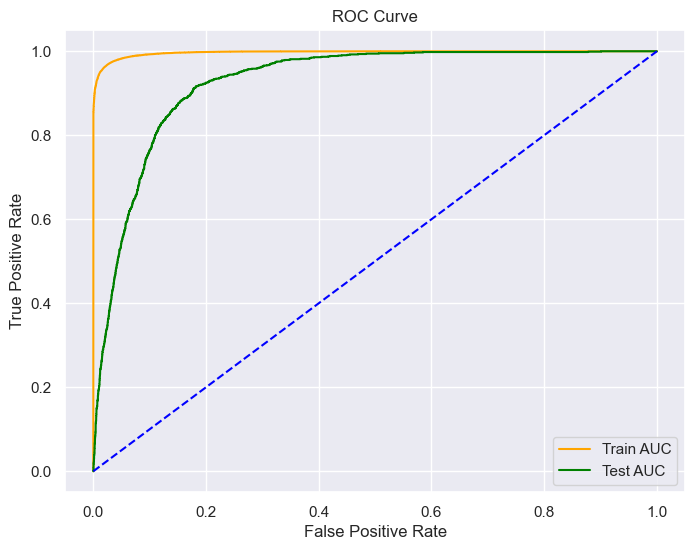

In [265]:
# Evaluation
print("----- XGBoost Classifier -----")
print(f" Train Accuracy: {train_acc_xgb:.4f}")
print(f" Test Accuracy : {test_acc_xgb:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_xgb:.4f}")
print(f" Test AUC: {test_auc_xgb:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_xgb))

# ROC Curves
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train_sm, y_train_proba_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_proba_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, label='Train AUC', color='orange')
plt.plot(fpr_test_xgb, tpr_test_xgb, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

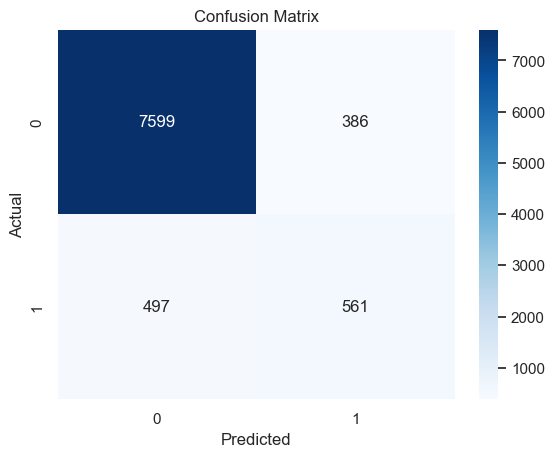

In [266]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Hyperparameter Tuning for Gradient Boosting Classifier**

In [268]:
# Define parameter Grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],                  # Max depth of individual trees
    'min_samples_split': [2, 5, 10],         # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Min samples at a leaf node
    'subsample': [0.6, 0.8, 1.0],            # Fraction of samples used per tree
    'max_features': ['sqrt', 'log2', None]   # Features to consider at each split
}

In [269]:
# Initialize Model
gb = GradientBoostingClassifier(random_state=42)

In [270]:
# Create GridSearch
random_search_gb = RandomizedSearchCV(estimator=gb,
                                      param_distributions=param_grid_gb,
                                      n_iter=30,
                                      scoring='roc_auc',
                                      cv=5,
                                      verbose=1,
                                      n_jobs=-1,
                                      random_state=42)

In [271]:
# Fit the Model on Training Data
random_search_gb.fit(X_train_scaled, y_train_sm)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [272]:
# Best Parameters
print("Best Parameters:", random_search_gb.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.05}


In [273]:
# Best Estimator
best_gb = random_search_gb.best_estimator_

# **Gradient Boosting Classifier (After Hyperparameter Tuning)**

In [275]:
# Predict
y_train_pred_gb = best_gb.predict(X_train_scaled)
y_test_pred_gb = best_gb.predict(X_test_scaled)

In [276]:
train_acc_gb = accuracy_score(y_train_sm, y_train_pred_gb)
test_acc_gb = accuracy_score(y_test, y_test_pred_gb)

In [277]:
y_train_proba_gb = best_gb.predict_proba(X_train_scaled)[:, 1]
y_test_proba_gb = best_gb.predict_proba(X_test_scaled)[:, 1]

In [278]:
# Compute AUC Scores
train_auc_gb = roc_auc_score(y_train_sm, y_train_proba_gb)
test_auc_gb = roc_auc_score(y_test, y_test_proba_gb)

----- Gradient Boosting Classifier -----
 Train Accuracy: 0.9678
 Test Accuracy : 0.9025
*************************************
 Train AUC: 0.9961
 Test AUC: 0.9279
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.59      0.54      0.57      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.75      0.76      9043
weighted avg       0.90      0.90      0.90      9043



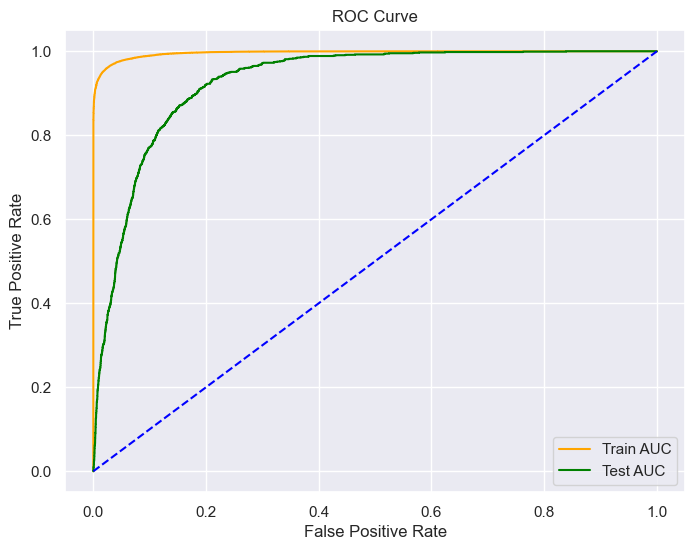

In [279]:
# Evaluation
print("----- Gradient Boosting Classifier -----")
print(f" Train Accuracy: {train_acc_gb:.4f}")
print(f" Test Accuracy : {test_acc_gb:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_gb:.4f}")
print(f" Test AUC: {test_auc_gb:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_gb))

# ROC Curves
fpr_train_gb, tpr_train_gb, _ = roc_curve(y_train_sm, y_train_proba_gb)
fpr_test_gb, tpr_test_gb, _ = roc_curve(y_test, y_test_proba_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_gb, tpr_train_gb, label='Train AUC', color='orange')
plt.plot(fpr_test_gb, tpr_test_gb, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

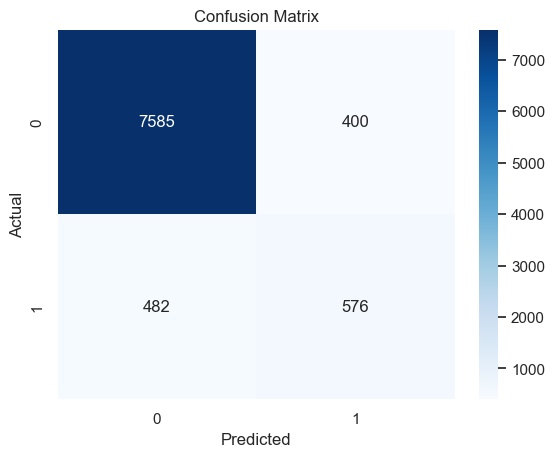

In [280]:
# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_test_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Hyperparameter Tuning for Random Forest**

In [282]:
# Define parameter Grid
param_grid_rf = {
    'n_estimators': [100, 200],             # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum tree depth
    'min_samples_split': [2, 5, 10],        # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Min samples at a leaf node
    'max_features': ['sqrt', 'log2'],       # Features considered at each split
    'bootstrap': [True, False]              # Sampling method
}

In [283]:
# Initialize Model 
rf = RandomForestClassifier(random_state=42)

In [284]:
from sklearn.model_selection import GridSearchCV

In [285]:
# Create GridSearch
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              scoring='roc_auc',
                              cv=5,
                              n_jobs=-1,
                              verbose=1)

In [286]:
# Fit on the SMOTE + scaled training data
grid_search_rf.fit(X_train_scaled, y_train_sm)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [287]:
# Best Parameters
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [288]:
# Best estimator
best_rf = grid_search_rf.best_estimator_

# **Random Forest (After Hyperparameter Tuning)**

In [290]:
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

In [291]:
train_acc_rf = accuracy_score(y_train_sm, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

In [292]:
y_train_proba_rf = best_rf.predict_proba(X_train_scaled)[:, 1]
y_test_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

In [293]:
# Compute AUC Scores
train_auc_rf = roc_auc_score(y_train_sm, y_train_proba_rf)
test_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

----- Random Forest -----
 Train Accuracy: 1.0000
 Test Accuracy : 0.8964
*************************************
 Train AUC: 1.0000
 Test AUC: 0.9163
*************************************

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.57      0.49      0.53      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.72      0.73      9043
weighted avg       0.89      0.90      0.89      9043



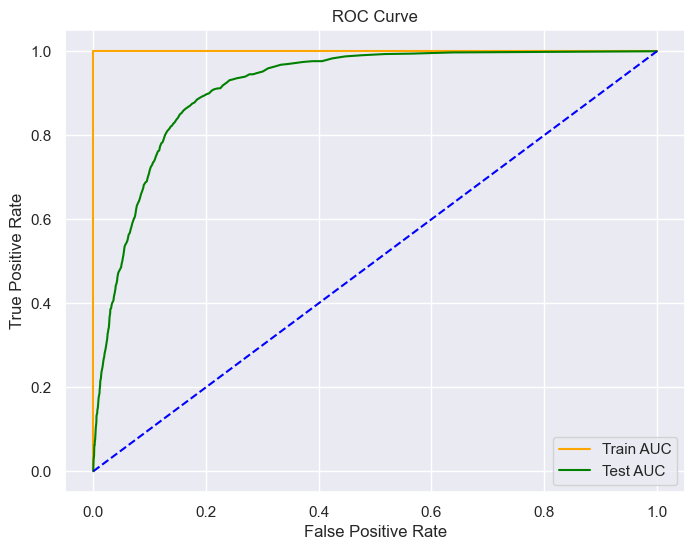

In [294]:
# Evaluation
print("----- Random Forest -----")
print(f" Train Accuracy: {train_acc_rf:.4f}")
print(f" Test Accuracy : {test_acc_rf:.4f}")
print('*************************************')

print(f" Train AUC: {train_auc_rf:.4f}")
print(f" Test AUC: {test_auc_rf:.4f}")
print('*************************************')

print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_rf))

# ROC Curves
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_sm, y_train_proba_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_proba_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label='Train AUC', color='orange')
plt.plot(fpr_test_rf, tpr_test_rf, label='Test AUC', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()

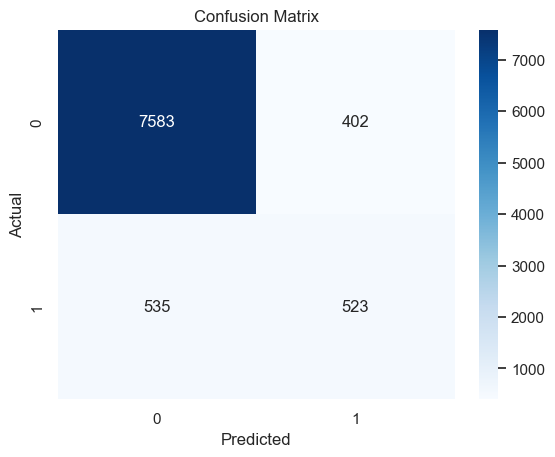

In [295]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **📊 Final Model Comparison**

In [505]:
# Model comparison data
data = [
    ['Logistic Regression', 0.9165, 0.8813, 0.9727, 0.8581, 0.49, 0.50, 0.50],
    ['K-Nearest Neighbors (KNN)', 0.9501, 0.8770, 0.9922, 0.8003, 0.47, 0.41, 0.44],
    ['Decision Tree', 1.0000, 0.8680, 1.0000, 0.7243, 0.45, 0.54, 0.49],
    ['Random Forest', 1.0000, 0.8964, 1.0000, 0.9163, 0.57, 0.49, 0.53],
    ['Support Vector Machine (SVM)', 0.9358, 0.8941, 0.9835, 0.8711, 0.56, 0.45, 0.50],
    ['Naive Bayes', 0.8264, 0.8106, 0.9030, 0.7995, 0.33, 0.58, 0.42],
    ['XGBoost Classifier', 0.9713, 0.9024, 0.9968, 0.9268, 0.59, 0.53, 0.56],
    ['Gradient Boosting Classifier', 0.9678, 0.9025, 0.9961, 0.9279, 0.59, 0.54, 0.57]
]

headers = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train AUC', 'Test AUC', 'Precision', 'Recall', 'F1-Score']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as the index
df_models.set_index('Model', inplace=True)

# Format to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

Train Accuracy  Test Accuracy  Train AUC  \
Model                                                                    
Logistic Regression                   0.9165         0.8813     0.9727   
K-Nearest Neighbors (KNN)             0.9501         0.8770     0.9922   
Decision Tree                         1.0000         0.8680     1.0000   
Random Forest                         1.0000         0.8964     1.0000   
Support Vector Machine (SVM)          0.9358         0.8941     0.9835   
Naive Bayes                           0.8264         0.8106     0.9030   
XGBoost Classifier                    0.9713         0.9024     0.9968   
Gradient Boosting Classifier          0.9678         0.9025     0.9961   

                              Test AUC  Precision  Recall  F1-Score  
Model                                                                
Logistic Regression             0.8581       0.49    0.50      0.50  
K-Nearest Neighbors (KNN)       0.8003       0.47    0.41      0.44  
Decision Tree                   0.7243       0.45    0.54      0.49  
Random Forest                   0.9163       0.57    0.49      0.53  
Support Vector Machine (SVM)    0.8711       0.56    0.45      0.50  
Naive Bayes                     0.7995       0.33    0.58      0.42  
XGBoost Classifier              0.9268       0.59    0.53      0.56  
Gradient Boosting Classifier    0.9279       0.59    0.54      0.57

# **📊 Compare Models by F1 Score**

In [507]:
# Model performance data
performance_data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 
              'SVM', 'Naive Bayes', 'XGBoost', 'Gradient Boosting'],
    'F1': [0.50, 0.44, 0.49, 0.53, 0.50, 0.42, 0.56, 0.57]
}

In [508]:
# DataFrame
df_F1 = pd.DataFrame(performance_data)

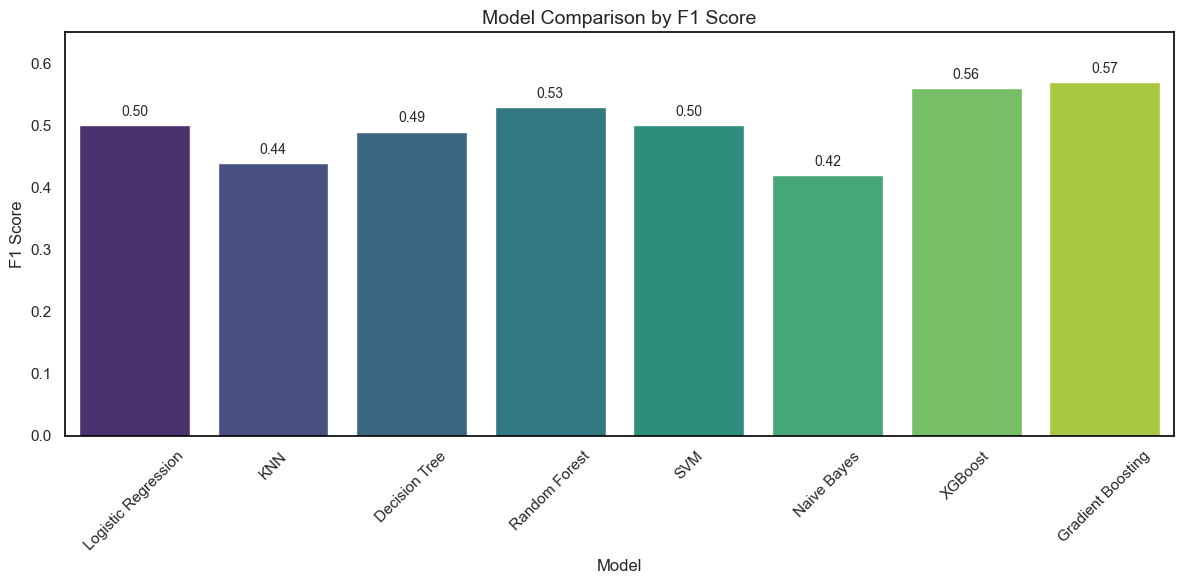

In [510]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white') 
ax.set_facecolor('white') 

# Plot
sns.barplot(x='Model', y='F1', data=df_F1, palette='viridis', ax=ax)

# Add labels
for i, v in enumerate(df_F1['F1']):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

# Add titles and formatting
ax.set_title('Model Comparison by F1 Score', fontsize=14)
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 0.65)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_visible(True)       
    spine.set_linewidth(1.2)      
    spine.set_color('black')   

plt.tight_layout()
plt.savefig("Model_Comparison_by_F1_Score.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### 🏆 Best Performer  
**Gradient Boosting** with highest F1 score of **0.57**  

### 🥈 Runner-up
**XGBoost** with F1 score of **0.56**

In [515]:
# Get feature importances from trained Gradient Boosting model
importances = best_gb.feature_importances_
feature_names = X_train.columns

In [517]:
# Create DataFrame of feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [519]:
# Map one-hot encoded features back to original group names
feature_group_map = {
    'job_': 'job',
    'marital_': 'marital',
    'education_': 'education',
    'contact_': 'contact',
    'poutcome_': 'poutcome',
    'balance_log': 'balance',
    'duration_log': 'duration',
    'contacted_before': 'pdays',
    'previously_contacted': 'previous',
    'job_blue-collar': 'job',
    'job_entrepreneur': 'job',
    'job_housemaid': 'job',
    'job_management': 'job',
    'job_retired': 'job',
    'job_self-employed': 'job',
    'job_services': 'job',    
    'job_student': 'job',     
    'job_technician': 'job',
    'job_unemployed': 'job',     
    'job_unknown': 'job', 
    'marital_married': 'marital',
    'marital_single': 'marital',
    'education_secondary': 'education',
    'education_tertiary': 'education',
    'education_unknown': 'education',
    'contact_telephone': 'contact',
    'contact_unknown': 'contact',
    'poutcome_other': 'poutcome',
    'poutcome_success': 'poutcome',
    'poutcome_unknown': 'poutcome',
   
}

In [521]:
def map_to_original(col):
    for prefix, original in feature_group_map.items():
        if col.startswith(prefix):
            return original
    return col 

In [523]:
feat_imp_df['Original Feature'] = feat_imp_df['Feature'].apply(map_to_original)

In [525]:
# Group importances by original feature name
grouped_feat_imp = (
    feat_imp_df.groupby('Original Feature')['Importance']
    .sum()
    .reset_index()
    .sort_values(by='Importance', ascending=False)
)

grouped_feat_imp['Importance (decimal)'] = grouped_feat_imp['Importance']

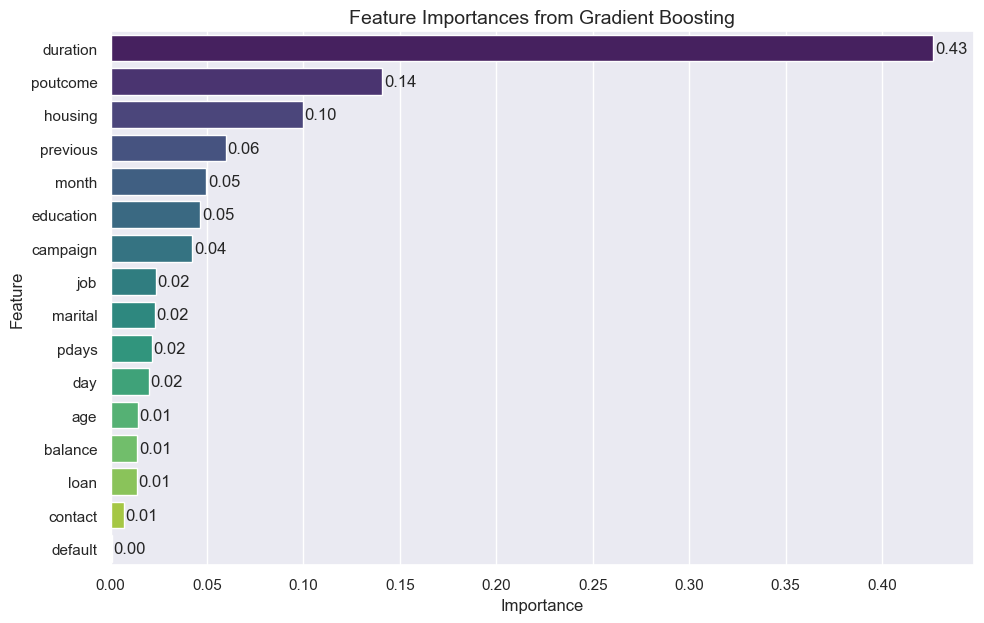

In [527]:
# Plot all features
plt.figure(figsize=(10, len(grouped_feat_imp) * 0.4))
ax = sns.barplot(x='Importance', y='Original Feature', data=grouped_feat_imp, palette="viridis")
sns.set_style("white")
# Add labels
for i, val in enumerate(grouped_feat_imp['Importance (decimal)']):
    plt.text(val + 0.001, i, f"{val:.2f}", va='center')

plt.title("Feature Importances from Gradient Boosting", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **🔚 Conclusion**

The goal of this project was to build a robust classification model to predict whether a client will subscribe to a term deposit, based on their demographic and campaign-related features.

### 📌 Summary of Key Steps & Findings:

- **Data Quality:**  
  - The dataset was clean with no missing values.  
  - Outliers were handled using clipping and log transformation.  
  - Numerical features were standardized using **StandardScaler**.

- **Class Imbalance Handling:**  
  - Applied **SMOTE** to balance the minority class and improve model sensitivity to term deposit subscriptions.

- **Model Selection & Performance:**  
  - Among various models, the **Gradient Boosting Classifier** performed best:
    - **F1-Score:** 0.57 (balanced precision and recall)  
    - **Test Accuracy:** 90.25%  
    - **AUC-ROC:** 0.9279 (excellent class separation)

- **Most Influential Features:**  
  - `duration` (call duration) – **43%**  
  - `poutcome` (previous campaign outcome) – **14%**  
  - `housing` (loan status) – **10%**  
  - `previous` (number of contacts) – moderate impact

### 🎯 Final Outcome:
The final model shows strong predictive power and can be reliably used to identify potential clients who are likely to subscribe to a term deposit. It balances class performance through SMOTE and achieves high AUC, making it suitable for targeted marketing or customer retention strategies.
